# Load aggregated values per ice shelf
## Making timeseries of area, damage, and Damage-fraction (ipv barchart)

In [1]:
import os
# import rioxarray as rioxr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
# import xarray as xr

# import rasterio as rio

import pandas as pd 
import seaborn as sns
# import dask

# Import user functions
import nbFunctions as myf 


In [2]:
homedir = '/Users/tud500158/Library/Mobile Documents/com~apple~CloudDocs/Documents/Documents - TUD500158/'

path2savefig = os.path.join(homedir,'Data/NERD/plots_dev/')
# path2data = os.path.join(homedir,'Data/NERD/DMG_aggregated/')

''' --------------
Get Shapefiles 
------------------ '''
# geojson
gridTiles_geojson_path = os.path.join(homedir,'Data/tiles/gridTiles_iceShelves_EPSG3031.geojson')
gridTiles = gpd.read_file(gridTiles_geojson_path)

# measures ice shelves
iceshelf_path_meas = os.path.join(homedir, 'QGis/Quantarctica/Quantarctica3/Glaciology/MEaSUREs Antarctic Boundaries/IceShelf/IceShelf_Antarctica_v02.shp')
iceshelf_poly_meas = gpd.read_file(iceshelf_path_meas)

## redefined: SECTORS for AIS
# sector_path = os.path.join(homedir, 'QGis/data_NeRD/plot_insets_AIS_sectors.shp')
sector_path = os.path.join(homedir, 'QGis/data_NeRD/AIS_outline_sectors.shp')
sector_poly = gpd.read_file(sector_path)
sector_ID_list = sector_poly['sector_ID'].to_list()
sector_ID_list.sort()
sector_ID_list

['ASE', 'BSE', 'EIS', 'RS', 'WIS', 'WIS-a', 'WIS-b', 'WS', 'WS-a', 'WS-b']

# Load annual files per region and merge to annual-AIS-wide dataset of all ice shelves

In [3]:
from cycler import cycler

# plt.rcParams.update({'font.size': 16})
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18
fs=14
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


''' --------
COLORS
-----------'''

# currentdir = os.getcwd()
# os.chdir('../files/')
# import hawaiiS
# os.chdir(currentdir)

# cm_data = hawaiiS.cm_data
# # hawaii_cat = LinearSegmentedColormap.from_list('hawaii', cm_data) 
# # hawaii_cat
# hawaii_cat = sns.color_palette(cm_data,6)
# hawaii_cat

# cubeH_palette
print('cubeH_palette for sectors')
cubeH_palette = sns.color_palette("cubehelix", 9)[2:-1]
display(sns.color_palette(cubeH_palette))

## Can look for different shades of HEX here: https://www.color-hex.com/color/721f82

## DMG cmap
# 
### Damage classes
magma_palette_r = sns.color_palette('magma_r',5) # ['#3b0f70', '#8c2981', '#de4968', '#fe9f6d']
bblue_rgb = (0.6352941176470588, 0.8117647058823529, 0.996078431372549)
magma_palette_r.insert(0,bblue_rgb)
print('magma_palette')
display(magma_palette_r)


### Timeseires 1997; 2015-2021
my_palette = sns.color_palette('crest',5) # can access i'th color by indexing
my_palette2 = ['salmon']+ my_palette
rgb_salmon = np.array([250,128,114])/255

my_palette2long = ['salmon']+ sns.color_palette('crest',7) 
rgb_salmon = tuple(np.array([250,128,114])/255)
my_palette2long = [rgb_salmon]+ sns.color_palette('crest',7) 
my_palette2rgb = [tuple(rgb_salmon)] + my_palette2long[1:] # only rgb values
print('Palette-long')
display(sns.color_palette(my_palette2rgb))

print('magma palette_r : ', magma_palette_r.as_hex()) #[ '#A2CEFE',    '#FFAF78',    '#F1675D',    '#B54279',    '#721F82',    '#2B114F']
print('Palette-long: temporal_pallete 1997+crest : ', sns.color_palette(my_palette2long).as_hex()) 

# my_palette2long = list(rgb_salmon)+ sns.color_palette('crest',7) 
# sns.color_palette('crest',7) 
# sns.color_palette('#fa8072',1)



cubeH_palette for sectors


[(0.11789134778719829, 0.39694259707734425, 0.2588678372388254),
 (0.3292772926340829, 0.4762845556584382, 0.1837155549758328),
 (0.6328422475018423, 0.4747981096220677, 0.29070209208025455),
 (0.8146245329198283, 0.49548316572322215, 0.5752525936416857),
 (0.812420762188067, 0.6167295569758052, 0.8578575836301946),
 (0.7587183008012618, 0.7922069335474338, 0.9543861221913403)]

magma_palette


[(0.6352941176470588, 0.8117647058823529, 0.996078431372549),
 (0.997077, 0.690088, 0.471811),
 (0.944006, 0.377643, 0.365136),
 (0.709962, 0.212797, 0.477201),
 (0.445163, 0.122724, 0.506901),
 (0.171713, 0.067305, 0.370771)]

Palette-long


[(0.9803921568627451, 0.5019607843137255, 0.4470588235294118),
 (0.50711872, 0.73665492, 0.56821764),
 (0.37890483, 0.66859548, 0.56566462),
 (0.28251558, 0.59517119, 0.56181204),
 (0.20094292, 0.52087429, 0.55342884),
 (0.12709242, 0.44601517, 0.54438795),
 (0.11646936, 0.36578429, 0.52726234),
 (0.15138673, 0.27982444, 0.49119848)]

magma palette_r :  ['#a2cffe', '#feb078', '#f1605d', '#b5367a', '#721f81', '#2c115f']
Palette-long: temporal_pallete 1997+crest :  ['#fa8072', '#81bc91', '#61aa90', '#48988f', '#33858d', '#20728b', '#1e5d86', '#27477d']


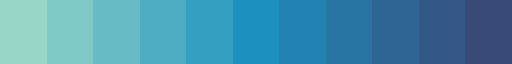

In [43]:
import matplotlib.colors as mcolors
import numpy as np

# moa_colors = ['#fa8579','#fac679','#9fcbab']
# custom_palette = sns.color_palette(moa_colors)
# print('moa color steps')
# display(custom_palette)

# start_color = mcolors.hex2color('salmon')
# middle_color = mcolors.hex2color('#fac679')
# end_color = mcolors.hex2color('#81bc91')

# n_colors = 7  # Number of colors between the start and end colors
# n_colors = 11  # Number of colors between the start and end colors

def make_cmap(start_color, end_color, middle_color=None , n_colors=11):
    if middle_color is not None:

        colors = [start_color]

        for i in range(1, n_colors - 1):
            if i < n_colors / 2:
                # Interpolate between the start color and the middle color
                r = start_color[0] + (middle_color[0] - start_color[0]) * (i / (n_colors / 2))
                g = start_color[1] + (middle_color[1] - start_color[1]) * (i / (n_colors / 2))
                b = start_color[2] + (middle_color[2] - start_color[2]) * (i / (n_colors / 2))
            else:
                # Interpolate between the middle color and the end color
                r = middle_color[0] + (end_color[0] - middle_color[0]) * ((i - n_colors / 2) / (n_colors / 2))
                g = middle_color[1] + (end_color[1] - middle_color[1]) * ((i - n_colors / 2) / (n_colors / 2))
                b = middle_color[2] + (end_color[2] - middle_color[2]) * ((i - n_colors / 2) / (n_colors / 2))
            
            colors.append((r, g, b))
        colors.append(end_color)
        custom_colormap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', colors, N=n_colors)
    else:
        colors =[start_color, end_color]
        custom_colormap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', colors, N=n_colors)

    return custom_colormap 

# custom_colormap = make_cmap( start_color, end_color, middle_color=middle_color , n_colors=11) 

# display(custom_colormap)

# # Now, you can use the custom_colormap in your visualizations
# print('moa_palette')
# moa_palette = [custom_colormap(2), custom_colormap(5),custom_colormap(7)]
# sns.color_palette(moa_palette)

# ### ADD TO PALETTE 
# my_palette_0421 = ['salmon'] + moa_palette + sns.color_palette('crest',7) 
# sns.color_palette(my_palette_0421)


## Npx hex
c1 = '#98d7c8' # '#7FCDBB'
c2 = '#081D58'
cmap_blues = make_cmap( c1,  c2, middle_color=None , n_colors=11) 
cmap_blues = mcolors.LinearSegmentedColormap.from_list('custom_colormap', ['#98d7c8','#1d91c0','#394a79'], N=n_colors)
cmap_blues


# Load data

In [5]:

# ''' ---------
# ### Load all (downsampled) AIS shapefiles
# ------------ '''
# df_data=pd.DataFrame()
# for year in years_list:
#     print("Loading {}".format(year))

#     # df_year_AIS_file = 'aggregated_dmg_per_iceshelf_AIS_' + str(year) + '.shp'

#     df_year_AIS_file = [file for file in df_file_list if str(year) in file][0]

#     ## Load data
#     df_year_AIS = gpd.read_file(os.path.join(path2agg,df_year_AIS_file))

#     ## intersect iceshelf gpd with sector for SNS grouping
#     df_year_AIS = gpd.sjoin(df_year_AIS, sector_df, how='right').drop(['index_left','x_label','y_label'],axis=1)
#     df_year_AIS['time']=year

#     df_data_tmp = df_year_AIS # [['time','sector_ID','NAME', 'index_left','Npx','#DMG','ratio']]
#     df_data = pd.concat([df_data, df_data_tmp])

In [6]:
   
def load_df_years_AIS(filelist, yearlist,path2files, sector_df):
    df_data=pd.DataFrame()

    ## make sure partial-sectors are discarded, only intersect geometries with large sectors
    
    sector_df = sector_df.drop(sector_df.index[ sector_df['sector_ID'].isin(
                            ['WS-a','WS-b','WIS-a','WIS-b']) ], axis=0)
    
    print(f"Loading {len(filelist)} files")#.format(year))
    for year in yearlist:
        # print("Loading {}".format(year))

        df_year_AIS_file = [file for file in filelist if str(year) in file][0]

        ## Load data
        df_year_AIS = gpd.read_file(os.path.join(path2files,df_year_AIS_file)) ## has geometry, but no column with easy accessible sector_ID

        ## intersect iceshelf gpd with sector for easy data grouping
        df_year_AIS = gpd.sjoin(df_year_AIS, sector_df, how='right').drop(['index_left','x_label','y_label'],axis=1)
        df_year_AIS['time']=year

        df_data = pd.concat([df_data, df_year_AIS])
    return df_data

In [7]:
## Drop splitparts of sectors
sector_df = sector_poly.copy()
sector_df

path2data = os.path.join(homedir,'Data/NERD/dmg095_nc/aggregated/')

''' ---------
### SELECT SUBDIR
------------ '''


## Load DOWNSAMPLED data so every year is comparable
subdir = '_aggregated_with_nodataMask_any/' ## strict mask. If any px has nodata in a year, its removed.
# years_list = [1997, 2004, 2009, 2014]+ list(np.arange(2015,2022)) 
years_list = [1997, 2000]+ list(np.arange(2015,2022)) 

path2agg = os.path.join(path2data, subdir)

## sanity check old files
years_list = [1997]+ list(np.arange(2015,2022)) 
path2agg = os.path.join(homedir, 'Data/NERD/dmg095_nc/_aggregated_with_nodataMask_anyARCHIVE/aggregated_1000m/') ## only AIS files, made in Oct2023
path2agg = os.path.join(homedir, 'Data/NERD/data_organise/v0_forPlots/aggregated/') ## Original files for plot, made in Oct2023, copied to new folder . Based on donwsmapled_netcdfs (I think, quite cerently)
path2agg = os.path.join(homedir, 'Data/NERD/data_organise/v0_forPlots/reproduced_newscript/') ## Tried to reproduces the shpaefiles used for plotting, with downsampeld_netcdfs
path2agg = os.path.join(homedir, 'Data/NERD/data_organise/v0_forPlots/reproduced_oldscript/') ## Tried to reproduces the shpaefiles used for plotting, with downsampeld_netcdfs -- dit is juist!! dus dan zit t m in de masks.. 
  

''' ---------
### Load all (downsampled) AIS shapefiles
------------ '''
## Load file list
df_file_list = glob.glob(path2agg + 'aggregated_dmg_per_iceshelf_AIS*.shp')
# df_file_list = glob.glob(os.path.join(path2agg , '_perSector_v0' , 'aggregated_dmg_per_iceshelf*AIS*.shp') )
# df_file_list = glob.glob(os.path.join(path2agg , '_perSector_v0/_redone_fillD0' , 'aggregated_dmg_per_iceshelf*AIS*.shp') )
df_file_list.sort()
years_list = [1997, 2015, 2016,2017,2018,2019,2020,2021]
df_data = load_df_years_AIS(df_file_list, years_list, path2agg, sector_df)

## also add 2000
df_list_2000 = glob.glob(os.path.join(homedir, 'Data/NERD/data_organise/add_2000/reproduced_oldscript/','aggregated_dmg_per_iceshelf_AIS*.shp'))
df_2000 = load_df_years_AIS(df_list_2000, [2000], path2agg, sector_df)

df_data = pd.concat([df_data, df_2000]).sort_values(['NAME','time'])

## update LC -- already updated in v0 shp
# df_lc_2016 = gpd.read_file(os.path.join(path2agg,'_perSector_v0/_update_LC_Dgt0/', 'aggregated_dmg_per_iceshelf_WS-2016_1000m.shp')) ## has geometry, but no column with easy accessible sector_ID
# df_lc_2016 = gpd.sjoin(df_lc_2016, sector_df, how='right').drop(['index_left','x_label','y_label'],axis=1)
# df_lc_2016['time']=2016
# df_lc_2016 = df_lc_2016.loc[df_lc_2016['sector_ID']=='WS'].drop(['Regions'],axis=1)

# ## really v0 LC
# df_lc_2016 = gpd.read_file(os.path.join(path2agg,'_perSectorARCHIVE/', 'aggregated_dmg_per_iceshelf_WS-2016_1000m.shp')) ## has geometry, but no column with easy accessible sector_ID
# df_lc_2016 = gpd.sjoin(df_lc_2016, sector_df, how='right').drop(['index_left','x_label','y_label'],axis=1)
# df_lc_2016['time']=2016
# df_lc_2016 = df_lc_2016.loc[df_lc_2016['sector_ID']=='WS'].drop(['Regions'],axis=1)

# ## LC without fill 0
# df_lc_2016 = gpd.read_file(os.path.join(path2agg,'_updateLC_maar_countD0_as_nan_potentially/', 'aggregated_dmg_per_iceshelf_WS-2016_1000m.shp')) ## has geometry, but no column with easy accessible sector_ID
# df_lc_2016 = gpd.sjoin(df_lc_2016, sector_df, how='right').drop(['index_left','x_label','y_label'],axis=1)
# df_lc_2016['time']=2016
# df_lc_2016 = df_lc_2016.loc[df_lc_2016['sector_ID']=='WS'].drop(['Regions'],axis=1)

''' ---------
### Load also the uncertainty bounds: method 2, using stricter threshold only
------------ '''
years_list = [1997, 2000]+ list(np.arange(2015,2022)) 

# ## Load data stricter threshold
# path2agg = os.path.join(path2data, 'stricter-d099', subdir)
# df_file_list = glob.glob(path2agg + 'aggregated_dmg_per_iceshelf*.shp')
# df_file_list.sort()
# # print(df_file_list)
# df_data_d099 = load_df_years_AIS(df_file_list, years_list, path2agg, sector_df).sort_values(['NAME','time'])
# df_data_d099.head()


# ## Load data stricter thresold B
# path2agg = os.path.join(path2data, 'stricter-d095', subdir)
# df_file_list = glob.glob(path2agg + 'aggregated_dmg_per_iceshelf*.shp')
# df_file_list.sort()
# df_data_d095 = load_df_years_AIS(df_file_list, years_list, path2agg, sector_df).sort_values(['NAME','time'])
# df_data_d095.head()

# ## Load data stricter thresold B
# path2agg = os.path.join(path2data, 'stricter-pct25', subdir)
# df_file_list = glob.glob(path2agg + 'aggregated_dmg_per_iceshelf*.shp')
# df_file_list.sort()
# df_data_p25 = load_df_years_AIS(df_file_list, years_list, path2agg, sector_df).sort_values(['NAME','time'])
# df_data_p25.head()


## Load data stricter thresold B
# path2agg = os.path.join(path2data, 'stricter-pct05', subdir)
path2agg = os.path.join(homedir, 'Data/NERD/data_organise/stricter-pct05/') 
df_file_list = glob.glob(path2agg + 'aggregated_dmg_per_iceshelf_AIS*.shp')
df_file_list.sort()
df_data_p05 = load_df_years_AIS(df_file_list, years_list, path2agg, sector_df).sort_values(['NAME','time'])
df_data_p05.head()

df_data

Loading 8 files
Loading 1 files
Loading 9 files


,NAME,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,sector_ID,sectorNAME,geometry,time
5,Abbot,112.969776,29416,4766,24650,0,2852,1622,292,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",1997
5,Abbot,109.137830,29799,6077,23722,0,3680,2016,381,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",2000
5,Abbot,88.529923,28611,5860,22751,0,4224,1300,336,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",2015
5,Abbot,65.292487,28513,4971,23542,0,3789,920,262,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",2016
5,Abbot,66.973731,28561,2843,25718,0,1687,849,307,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Zubchatyy,2.928068,272,53,219,0,11,22,20,WIS,West Indian,"POLYGON ((355417.402 2272581.101, 1130695.760 ...",2017
1,Zubchatyy,3.116466,272,83,189,0,38,21,24,WIS,West Indian,"POLYGON ((355417.402 2272581.101, 1130695.760 ...",2018
1,Zubchatyy,2.797997,272,84,188,0,38,27,19,WIS,West Indian,"POLYGON ((355417.402 2272581.101, 1130695.760 ...",2019
1,Zubchatyy,3.082912,272,82,190,0,32,27,23,WIS,West Indian,"POLYGON ((355417.402 2272581.101, 1130695.760 ...",2020


In [8]:
sector_IDs = df_data['sector_ID'].unique()
sector_IDs.sort()


#### Combine WIS-a and WIS-b
-- implemented in function

In [9]:
# # df_data_1000

# ## Combine WIS-a and WIS-b : replace values
# df_data['sector_ID'] = df_data['sector_ID'].replace(['WIS-a', 'WIS-b'], 'WIS')
# # df_data_1000['sector_ID'] = df_data_1000['sector_ID'].replace(['WIS-a', 'WIS-b'], 'WIS')
# sector_IDs = df_data['sector_ID'].unique()
# sector_IDs.sort()
# sector_IDs

# Plot timeseires

In [10]:
sectors = df_data['sector_ID'].unique()
# sectors = ['ASE', 'BSE', 'WS','EIS', 'RS' , 'WIS']
sectors.sort()
sectors

array(['ASE', 'BSE', 'EIS', 'RS', 'WIS', 'WS'], dtype=object)

## Plot for few ice shelves

In [11]:
def plot_axes_area_dmg(ax, data_plot, 
                        yvar_left=('#DMG', 'Damage area (px)'), 
                        yvar_right=('Npx', 'Ice shelf area(px)'),
                        yscale_log=False,
                        ax_title = '',
                        ):

    years_plot = [str(y) for y in list(data_plot['time'].unique())]
    x2 = np.arange(1,len(years_plot)+1) # data_plot['time'] #  data_nerd['time']
    ax2 = ax.twinx()

    ''' -----------------
    ## Left y-axis
    ----------------- '''
    ''' Damage Area '''
    # yvar = '#DMG'; yname='Damage area (px)'
    yvar, yname = yvar_left
    ycol='#721f81'; ystyle='^';
    h1= ax.plot(x2[:2], data_plot.loc[data_plot['time']<2014][yvar].values, color=ycol,label=yvar) # 1997;2000
    h1= ax.plot(x2[2:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label=yvar) # 2015-2021
    ax.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_') # my_palette2long) 
    if yscale_log:
        ax.set_yscale('log')
    ax.set_ylabel(yname)

    # Set the color of the right-hand sided y-axis label and tick labels
    ax.yaxis.label.set_color(ycol)
    ax.tick_params(axis='y', colors=ycol,which='both')
    ax.spines['left'].set_color(ycol)

    ## general axis stuff
    ax.set_title(ax_title)
    ax.set_xticks(x2, years_plot, rotation=45) 
    ax.grid('major',color=[0.9, 0.9, 0.9],which='both')
    

    ''' -----------------
    ## Right y-axis
    ----------------- '''
    ''' Ice Shelf Area '''
    yvar, yname = yvar_right
    ycol = '#579a4b'; ystyle='x'
    # h2 = ax2.plot(x2[1:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label=yvar)
    h2 = ax2.plot(x2[:2], data_plot.loc[data_plot['time']<2014][yvar].values, color=ycol,label=yvar)
    h2 = ax2.plot(x2[2:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label=yvar)
    ax2.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_')# my_palette2long) 

    if yscale_log:
        ax2.set_yscale('log')
    ax2.set_ylabel(yname)
    
    # Set the color of the right-hand sided y-axis label and tick labels
    ax2.yaxis.label.set_color(ycol)
    ax2.tick_params(axis='y', colors=ycol,which='both') # doesnt work
    ax2.spines['right'].set_color(ycol)

    return ax, ax2

def plot_axes_area_dmg_dfrac(ax, data_plot, 
                        yvar_left1=('#DMG', 'Damage area (px)'), 
                        yvar_left2=('Npx', 'Ice shelf area(px)'), 
                        yvar_right=('Dfrac', 'Dfrac(%)'),
                        yscale_log=False,
                        ax_title = '',
                        add_legend=True,
                        ):
    years_plot = [str(y) for y in list(data_plot['time'].unique())]
    x2 = np.arange(1,len(years_plot)+1) # data_plot['time'] #  data_nerd['time']
    ax2 = ax.twinx()
    ax.grid('major',color=[0.9, 0.9, 0.9],which='both')

    if '2000' in years_plot:
        idx_break=2
    else:
        idx_break=1

    ''' -----------------
    ## Left y-axis
    ----------------- '''
    ''' Damage Area '''
    # yvar = '#DMG'; yname='Damage area (px)'
    yvar, yname = yvar_left1
    ycol='#721f81'; ystyle='^';
    h1= ax.plot(x2[:idx_break], data_plot.loc[data_plot['time']<2014][yvar].values, color=ycol,label='dmg') # 1997;2000
    h1= ax.plot(x2[idx_break:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label='dmg') # 2015-2021
    ax.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_') # my_palette2long) 

    ## ''' Dmg area Uncertainty '''
    ax.plot(x2[:idx_break], data_plot.loc[data_plot['time']<2014]['D_low'].values, color=ycol,linestyle='-',linewidth=0.5,label='p05') # 2015-2021
    ax.fill_between(x2[:idx_break], data_plot.loc[data_plot['time']<2014]['D_low'], 
                    data_plot.loc[data_plot['time']<2014][yvar], color=ycol, alpha=0.3, label='Uncertainty')
    ax.plot(x2[idx_break:], data_plot.loc[data_plot['time']>2014]['D_low'].values, color=ycol,linestyle='-',linewidth=0.5,label='p05') # 2015-2021
    ax.fill_between(x2[idx_break:], data_plot.loc[data_plot['time']>2014]['D_low'], 
                    data_plot.loc[data_plot['time']>2014][yvar], color=ycol, alpha=0.3, label='Uncertainty')

    if yscale_log:
        ax.set_yscale('log')
    if 'px' in yname:
        ax.set_ylabel('Area (px)')
    if 'km' in yname:
        ax.set_ylabel('Area ($km^2$)')


    ''' Ice Shelf Area '''
    if yvar_left2 is not None:
        # yvar = 'Npx'; yname='Ice shelf area(px)'
        yvar, yname = yvar_left2
        ycol = '#579a4b'; ystyle='x';
        h2 = ax.plot(x2[:idx_break], data_plot.loc[data_plot['time']<2014][yvar].values, color=ycol,label='ishelf')# 1997;2000
        h2 = ax.plot(x2[idx_break:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label='ishelf')# 2015-2021
        ax.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_')# my_palette2long) 


    '''## general axis stuff'''

    ax.set_title(ax_title)
    ax.set_xticks(x2, years_plot, rotation=45) 
    # ax.grid('major',color=[0.9, 0.9, 0.9],which='both')
    
    ## add legend
    if add_legend:
        ax.legend()

    ''' -----------------
    ## Right y-axis
    ----------------- '''
    ''' Dmg Frac'''
    yvar = 'Dfrac'; yname='Damage Fraction (%)'
    ycol = '#d3802b'; ystyle='o';
    h2 = ax2.plot(x2[:idx_break], data_plot.loc[data_plot['time']<2014][yvar].values, color=ycol,label='fraction')
    h2 = ax2.plot(x2[idx_break:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label='fraction')
    ax2.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_')# my_palette2long) 
    
    ##  ''' shelf area Uncertainty '''
    ax2.plot(x2[:idx_break], data_plot.loc[data_plot['time']<2014]['Dfrac_low'].values, color=ycol,linestyle='-',linewidth=0.5,label='p05') # 2015-2021
    ax2.fill_between(x2[:idx_break], data_plot.loc[data_plot['time']<2014]['Dfrac_low'], 
                    data_plot.loc[data_plot['time']<2014][yvar], color=ycol, alpha=0.3, label='Uncertainty')
    ax2.plot(x2[idx_break:], data_plot.loc[data_plot['time']>2014]['Dfrac_low'].values, color=ycol,linestyle='-',linewidth=0.5,label='p05') # 2015-2021
    ax2.fill_between(x2[idx_break:], data_plot.loc[data_plot['time']>2014]['Dfrac_low'], 
                    data_plot.loc[data_plot['time']>2014][yvar], color=ycol, alpha=0.3, label='Uncertainty')


    if yscale_log:
        ax2.set_yscale('log')

    ax2.set_ylabel(yname)

    ## make sure the ylims are generous
    ylims = ax2.get_ylim()
    if np.diff(ylims) < 10:
        # print('small % diff: ', ylims)
        ymid = ylims[0]+ np.diff(ylims)/2
        ylim_new = [ymid-5, ymid+5]
        ax2.set_ylim(ylim_new)

    
    # Set the color of the right-hand sided y-axis label and tick labels
    ax2.yaxis.label.set_color(ycol)
    ax2.tick_params(axis='y', colors=ycol,which='both') # doesnt work
    ax2.spines['right'].set_color(ycol)

    return ax, ax2

In [12]:
# df_data_p05

In [13]:
def data_prep(df_data,df_data_low=None, px_res = 1000 ):

    df_data['Dfrac'] = (df_data['#DMG']/df_data['Npx']*100).round(1) 
    ## area in km2 instead of px
    df_data['Area(km2)'] = df_data['Npx']*px_res*px_res/(1e6)
    df_data['DMG(km2)'] = df_data['#DMG']*px_res*px_res/(1e6)
    
    if df_data_low is not None:
        df_data['D_low']     = df_data_low['#DMG']
        df_data['Dfrac_low'] = (df_data_low['#DMG']/df_data_low['Npx']*100).round(1) 

        # ## make sure of correct row by row matching
        # # Merge dataframe1 with the specific column(s) of dataframe2 on the columns 'NAME' and 'time'
        # # We use how='left' to keep all rows from dataframe1 and add matching rows from dataframe2
        # df_data_low['D_low'] = df_data_low['#DMG']
        # df_data_low['Dfrac_low'] = (df_data_low['#DMG']/df_data_low['Npx']*100).round(1) 
        # df_data = pd.merge(df_data, df_data_low[['NAME', 'time', 'D_low','Dfrac_low']], on=['NAME', 'time'], how='left')

    return df_data

''' ---------------
    Data Prep 
-------------------'''
# df_nerd = df_data.copy() # [~df_data['time'].between(2004, 2014)]
years_nerd = [str(y) for y in list(df_data['time'].unique())]
years_nerd
px_res = 1000 ## used downsampled data

# df_nerd['Dfrac'] = (df_nerd['#DMG']/df_nerd['Npx']*100).round(1) 
# ## area in km2 instead of px
# df_nerd['Area(km2)'] = df_nerd['Npx']*px_res*px_res/(1e6)
# df_nerd['DMG(km2)'] = df_nerd['#DMG']*px_res*px_res/(1e6)

df_nerd = data_prep(df_data.copy(), df_data_p05,px_res=1000) 

# df_low = data_prep(df_data_lower.copy() , px_res=1000)
# df_upp= data_prep(df_data_upper.copy(), px_res=1000)
# df_p25 = data_prep(df_data_p25.copy(), px_res=1000)
df_p05 = data_prep(df_data_p05.copy(), px_res=1000)
# df_d099 = data_prep(df_data_d099.copy(), px_res=1000)
# df_d095 = data_prep(df_data_d095.copy(), px_res=1000)


## integrated sector
df_sector_sums = df_data.groupby(['sector_ID','time']).sum().reset_index()
df_sector_lows = df_data_p05.groupby(['sector_ID','time']).sum().reset_index()
df_sector_sum = data_prep(df_sector_sums, df_sector_lows, px_res=1000)

## integrated AIS
df_ais_sums = df_data.groupby(['time']).sum().reset_index()
df_ais_lows = df_data_p05.groupby(['time']).sum().reset_index()
df_ais_sum = data_prep(df_ais_sums, df_ais_lows, px_res=1000)


In [14]:
df_data_p05.columns, df_data.columns

(Index(['NAME', 'Dsum', 'Npx', '#DMG', '#noDMG', '#nodata', '#lowDMG',
        '#mediumDMG', '#highDMG', 'sector_ID', 'sectorNAME', 'geometry',
        'time'],
       dtype='object'),
 Index(['NAME', 'Dsum', 'Npx', '#DMG', '#noDMG', '#nodata', '#lowDMG',
        '#mediumDMG', '#highDMG', 'sector_ID', 'sectorNAME', 'geometry',
        'time'],
       dtype='object'))

In [15]:
# df_data.groupby(['sector_ID','time']).sum().reset_index()
# data_plot

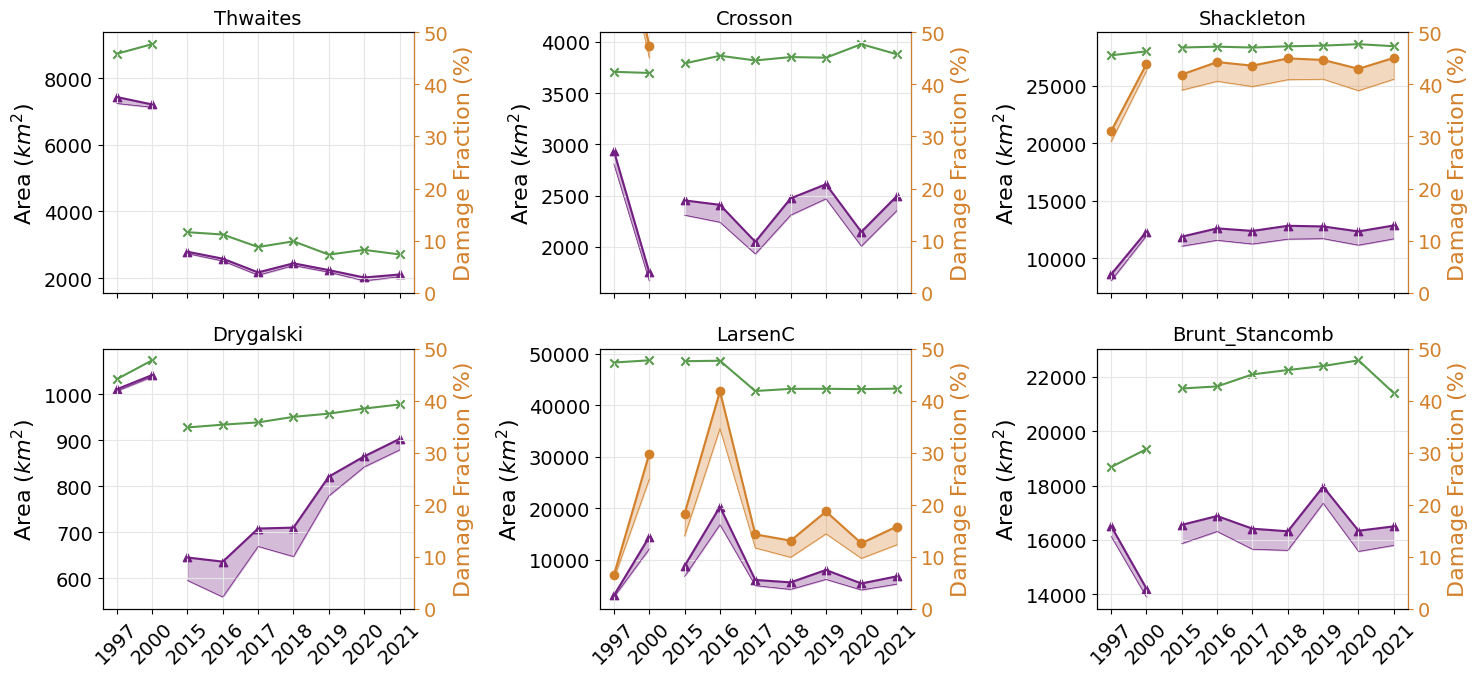

In [33]:

''' -----------------
## SUBPLOTS ICE SHELF
----------------- '''

fig, axs = plt.subplots(2, 3, figsize=(15, 7), sharex=True ) 
r=0;c=0
for i, ishelf in enumerate(['Thwaites','Crosson','Shackleton','Drygalski','LarsenC','Brunt_Stancomb']):
# for i, ishelf in enumerate(['Thwaites','Crosson','Brunt_Stancomb','Drygalski','LarsenC','Filchner']):
    data_plot = df_nerd.loc[df_nerd['NAME'] == ishelf]
    ax = axs[r, c]

    # ax, ax2 = plot_axes_area_dmg(ax, data_plot, 
    #                     yvar_left=('#DMG', 'Damage area (px)'), 
    #                     yvar_right=('Npx', 'Ice shelf area(px)'),
    #                     yscale_log=False,
    #                     ax_title = ishelf,
    #                     )
    
    ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                        # yvar_left1=('#DMG', 'Damage area (px)'), 
                        # yvar_left2=('Npx', 'Ice shelf area(px)'), 
                        yvar_left1=('DMG(km2)', 'Damaged area (km2)'), 
                        yvar_left2=('Area(km2)', 'Ice shelf area (km2)'), 
                        yvar_right=('Dfrac', 'Dfrac(%)'),
                        yscale_log=False,
                        ax_title = ishelf,
                        add_legend=False,
                        )


    # data_d099 = df_d099.loc[df_d099['NAME']==ishelf]
    # data_d095 = df_d095.loc[df_d095['NAME']==ishelf]
    # data_p05  = df_p05.loc[df_p05['NAME']==ishelf]
    # data_p25  = df_p25.loc[df_p25['NAME']==ishelf]
    # x2 = np.arange(1,9+1) # idx 0-9 instead of 1997-2015-2021
    # yvar, yname = ('DMG(km2)', 'Damaged area (km2)')
    # ## d099
    # # ax.plot(x2[2:], data_d099.loc[data_d099['time']>2014][yvar].values, color='black',linestyle=':',label='d099') # 2015-2021
    # # ax.plot(x2[2:], data_d095.loc[data_d095['time']>2014][yvar].values, color='black',linestyle='-.',label='d095') # 2015-2021
    # ## p25
    # ax.plot(x2[2:], data_p05.loc[data_p05['time']>2014][yvar].values, color='#721f81',linestyle='-',linewidth=0.5,label='p05') # 2015-2021
    # ax.fill_between(x2[2:], data_p05.loc[data_p05['time']>2014][yvar], data_plot.loc[data_plot['time']>2014][yvar], color='#721f81', alpha=0.3, label='Uncertainty')

    # # ax.plot(x2[2:], data_p25.loc[data_p25['time']>2014][yvar].values, color='black',linestyle=':',label='p25') # 2015-2021
    

    # ## uncertainty Dfrac
    # ax2.plot(x2[2:], data_plot.loc[data_plot['time']>2014]['Dfrac_low'].values, color='orange',linestyle=':')

    # ax2.set_ylim([0,100]) 
    ax2.set_ylim([0,50]) # larsen, shackleton
    # ax2.set_ylim([40,95]) # others
    

    
    c+=1; 
    if c>2:  c=0; r+=1

fig.tight_layout()

## SAVE FIGURE
# fname = 'plot_timeseries_Area-DMG_annual_iceshelves'
# print('.. Saving ', fname)
# # fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.png' ), bbox_inches='tight')
# # fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.jpg' ), bbox_inches='tight')


# fname = 'plot_timeseries_Area-DMG_annual_iceshelves_uncertainty_pct05'
# fname = 'plot_timeseries_Area-DMG_annual_iceshelves_uncertainty_pct25'
# print('.. Saving ', fname)
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.png' ), bbox_inches='tight')



#### Shaded uncertainty

In [17]:
# yvar_left1=('DMG(km2)', 'Damaged area (km2)') 
# yvar_left2=('Area(km2)', 'Ice shelf area (km2)') 
# yvar_right=('Dfrac', 'Dfrac(%)')
# yscale_log=False
# add_legend=True

# fig, axs = plt.subplots(1, figsize=(7,5))#, sharex=True ) 
# r=0;c=0
# for i, ishelf in enumerate(['Thwaites']): # ,'Crosson','Shackleton','Drygalski','LarsenC','Filchner']):
#     data_plot = df_nerd.loc[df_nerd['NAME'] == ishelf]
#     data_low  = df_low.loc[df_low['NAME']==ishelf]
#     data_upp  = df_upp.loc[df_upp['NAME']==ishelf]
#     data_d099 = df_d099.loc[df_d099['NAME']==ishelf]
#     data_p25  = df_p25.loc[df_p25['NAME']==ishelf]

#     ax_title = ishelf
    
#     ''' plot prep '''
#     ax = axs# [r, c]

#     years_plot = [str(y) for y in list(data_plot['time'].unique())]
#     x2 = np.arange(1,len(years_plot)+1) # idx 0-9 instead of 1997-2015-2021
#     ax2 = ax.twinx()
#     ax.grid('major',color=[0.9, 0.9, 0.9],which='both')

#     ''' -----------------
#     ## Left y-axis
#     ----------------- '''
#     ''' Damage Area '''
#     # yvar = '#DMG'; yname='Damage area (px)'
#     yvar, yname = yvar_left1
#     ycol='#721f81'; ystyle='^';

#     ## dmg area values
#     h1= ax.plot(x2[:2], data_plot.loc[data_plot['time']<2014][yvar].values, color=ycol,label='dmg') # 1997;2000
#     h1= ax.plot(x2[2:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label=None) # 2015-2021
#     ax.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_') # my_palette2long) 
    
#     ## shhaed uncertainty
#     ax.fill_between(x2[2:], data_low.loc[data_plot['time']>2014][yvar], data_upp.loc[data_plot['time']>2014][yvar], color='gray', alpha=0.3, label='Uncertainty')
#     ## d099
#     ax.plot(x2[2:], data_d099.loc[data_d099['time']>2014][yvar].values, color='black',linestyle=':',label='d099') # 2015-2021
#     ## p25
#     ax.plot(x2[2:], data_p25.loc[data_p25['time']>2014][yvar].values, color='black',linestyle='--',label='p25') # 2015-2021

#     if yscale_log:
#         ax.set_yscale('log')
#     if 'px' in yname:
#         ax.set_ylabel('Area (px)')
#     if 'km' in yname:
#         ax.set_ylabel('Area ($km^2$)')


#     ''' Ice Shelf Area '''
#     # yvar = 'Npx'; yname='Ice shelf area(px)'
#     yvar, yname = yvar_left2
#     ycol = '#579a4b'; ystyle='x';
#     h2 = ax.plot(x2[:2], data_plot.loc[data_plot['time']<2014][yvar].values, color=ycol,label='ishelf')# 1997;2000
#     h2 = ax.plot(x2[2:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label=None)# 2015-2021
#     ax.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_')# my_palette2long) 

#     ## general axis stuff
#     ax.set_title(ax_title)
#     ax.set_xticks(x2, years_plot, rotation=45) 
#     # ax.grid('major',color=[0.9, 0.9, 0.9],which='both')
    
#     ## add legend
#     if add_legend:
#         ax.legend()

#     ''' -----------------
#     ## Right y-axis
#     ----------------- '''
#     ''' Dmg Frac'''
#     yvar = 'Dfrac'; yname='Damage Fraction (%)'
#     ycol = '#d3802b'; ystyle='o';
#     h2 = ax2.plot(x2[:2], data_plot.loc[data_plot['time']<2014][yvar].values, color=ycol,label='fraction')
#     h2 = ax2.plot(x2[2:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label='fraction')
#     ax2.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_')# my_palette2long) 
    
#     # if yscale_log:
#     #     ax2.set_yscale('log')

#     ax2.set_ylabel(yname)

#     ## make sure the ylims are generous
#     ylims = ax2.get_ylim()
#     if np.diff(ylims) < 10:
#         # print('small % diff: ', ylims)
#         ymid = ylims[0]+ np.diff(ylims)/2
#         ylim_new = [ymid-5, ymid+5]
#         ax2.set_ylim(ylim_new)

    
#     # Set the color of the right-hand sided y-axis label and tick labels
#     ax2.yaxis.label.set_color(ycol)
#     ax2.tick_params(axis='y', colors=ycol,which='both') # doesnt work
#     ax2.spines['right'].set_color(ycol)

In [18]:
# raise RuntimeError

In [19]:
data_plot
list(data_plot['time'].unique())
# data_plot.loc[data_plot['time']>2014]

[1997, 2000, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Individual plots etc

.. Saving  plot_timeseries_Area-DMG-Dfrac_annual_ishelf_Crosson_v0_uncertainty_pct05
.. Saving  plot_timeseries_Area-DMG-Dfrac_annual_ishelf_LarsenC_v0_uncertainty_pct05
.. Saving  plot_timeseries_Area-DMG-Dfrac_annual_ishelf_Brunt_Stancomb_v0_uncertainty_pct05
.. Saving  plot_timeseries_Area-DMG-Dfrac_annual_ishelf_Shackleton_v0_uncertainty_pct05
.. Saving  plot_timeseries_Area-DMG-Dfrac_annual_ishelf_Drygalski_v0_uncertainty_pct05
.. Saving  plot_timeseries_Area-DMG-Dfrac_annual_ishelf_Filchner_v0_uncertainty_pct05
.. Saving  plot_timeseries_Area-DMG-Dfrac_annual_ishelf_Thwaites_v0_uncertainty_pct05


' ----------------- \n## SINGLE PLOT PER ICE SHELF V2\n----------------- '

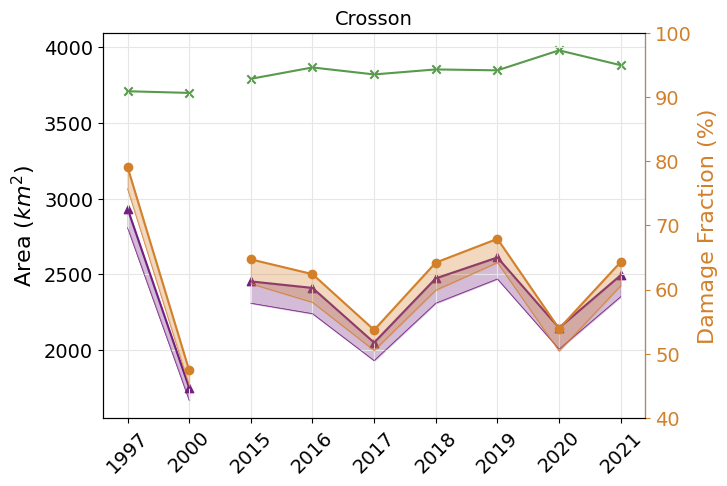

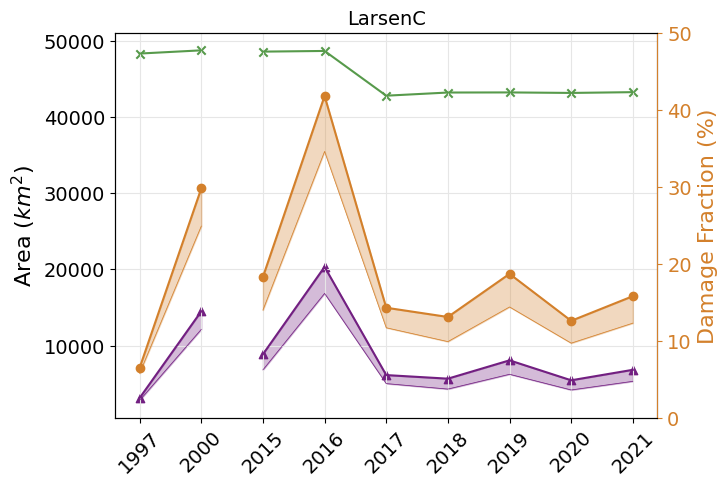

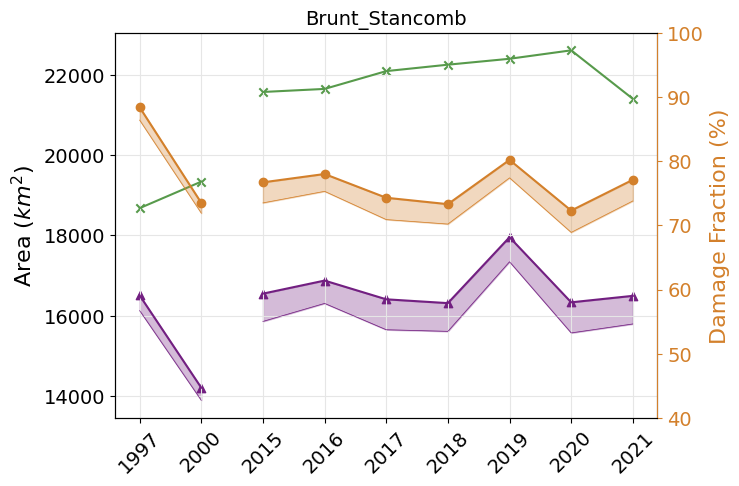

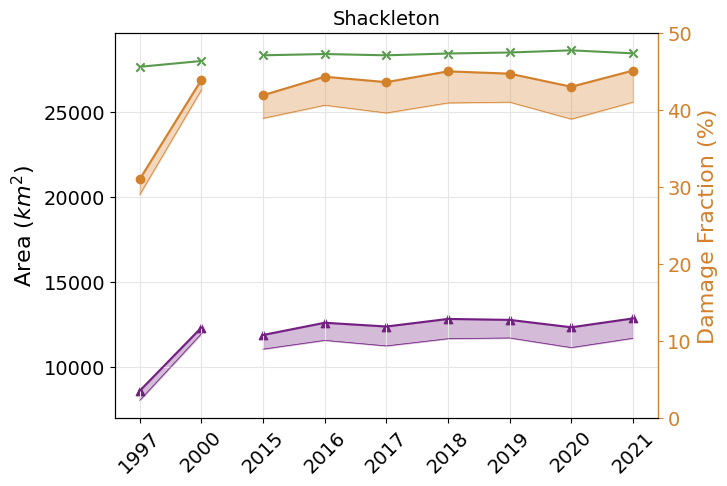

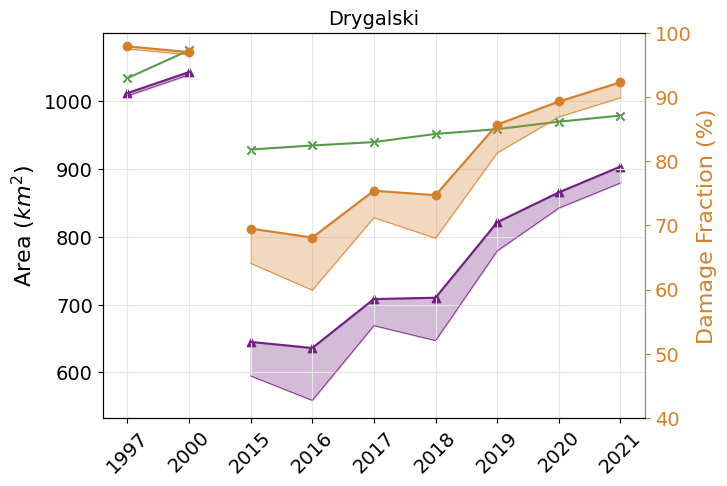

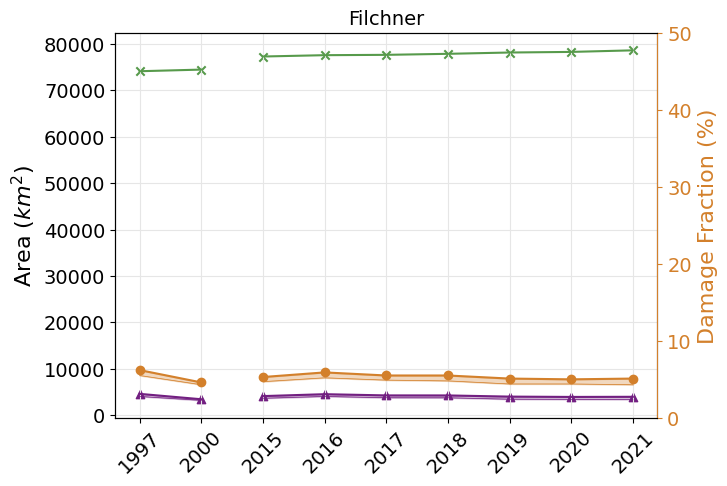

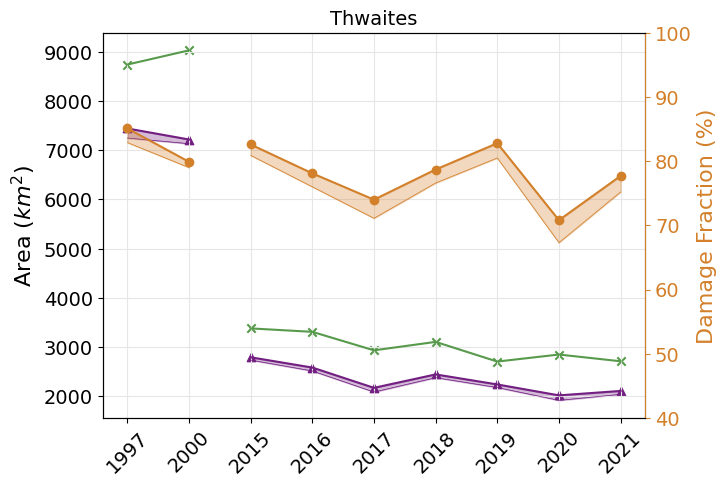

In [64]:


''' -----------------
## SINGLE PLOT PER ICE SHELF
----------------- '''
for i, ishelf in enumerate(['Crosson','LarsenC','Brunt_Stancomb','Shackleton','Drygalski','Filchner','Thwaites']):#,'Crosson','Shackleton','Drygalski','LarsenC','Filchner']):
    data_plot = df_nerd.loc[df_nerd['NAME'] == ishelf]

    fig, axs = plt.subplots(1, figsize=(7, 5), sharex=True ) 
    ax = axs
    ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                        # yvar_left1=('#DMG', 'Damage area (px)'), 
                        # yvar_left2=('Npx', 'Ice shelf area(px)'), 
                        yvar_left1=('DMG(km2)', 'Damaged area (km2)'), 
                        yvar_left2=('Area(km2)', 'Ice shelf area (km2)'), 
                        yvar_right=('Dfrac', 'Dfrac(%)'),
                        yscale_log=False,
                        ax_title = ishelf,
                        )
    # Remove the legend
    ax.legend().set_visible(False)

    if ishelf in ['LarsenC', 'Shackleton','Filchner']:
        ax2.set_ylim([0,50]) # larsen, shackleton
    else:
        ax2.set_ylim([40,100]) # others

    # # # ### SAVE FIGURE
    # # # # fname = 'plot_timeseries_Area-DMG-Dfrac_annual_ishelf_'+ishelf 
    # fname = f'plot_timeseries_Area-DMG-Dfrac_annual_ishelf_{ishelf}_v0_uncertainty_pct05'
    # print('.. Saving ', fname)
    # fig.savefig(os.path.join(path2savefig,'bar_plots',fname +'.png'), bbox_inches='tight')
    # fig.savefig(os.path.join(path2savefig,'bar_plots',fname +'.pdf'), bbox_inches='tight')



''' ----------------- 
## SINGLE PLOT PER ICE SHELF V2
----------------- '''
# for ishelf in ['Crosson','LarsenC']:
#     data_plot = df_nerd.loc[df_nerd['NAME'] == ishelf]
    
#     # ax = axs[r, c]
#     fig, axs = plt.subplots(2,1, figsize=(7, 5), sharex=True ) 
#     ax=axs[0]

#     # -- Top subplot
#     ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
#                         yvar_left1=('DMG(km2)', 'Damaged area (km2)'), 
#                         yvar_left2=None, 
#                         yvar_right=('Dfrac', 'Dfrac(%)'),
#                         yscale_log=False,
#                         ax_title = ishelf,
#                         add_legend=False,
#     )
#     # ax2.set_ylim([10, 50])
#     ax2.set_ylim([5, 75])

#     ax.set_ylabel(''); #ax2.set_ylabel('')

#     # -- Bottom subplot
#     # ax = axs[r+1,c]
#     ax3 = axs[1]
    
#     ax3 = plot_axes_area_dmg2(ax3, data_plot, 
#                         yvar_left=('Npx', 'Ice shelf area (km2)'), 
#                         yscale_log=False,
#                         ax_title = '', # sector_ID,
#                         )
#     ax3.set_ylabel('')
#     # ax.set_xticklabels([1997,2015,2016,2017,2018,2019,2020,2021]);

#     # c+=1; 
#     # if c>2:  c=0; r+=2
#     fig.tight_layout()


#     ## move second rows of axes closer to first row of axes for each sector
#     # for ax2 in list(axs[1,:])+list(list(axs[3,:])):
#     box = ax3.get_position()
#     box.y0 = box.y0 + 0.05 # move both corners (otherwise ratio adjusted)
#     box.y1 = box.y1 + 0.05 # move both corners (otherwise ratio adjusted)
#     ax3.set_position(box)
#     plt.show()


#     # ### SAVE FIGURE
#     # # fname = 'plot_timeseries_Area-DMG-Dfrac_annual_ishelf_'+ishelf 
#     # fname = f'plot_timeseries_Area-DMG-Dfrac_annual_ishelf_{ishelf}_uncertainty_pct05_splitPlot'
#     # print('.. Saving ', fname)
#     # fig.savefig(os.path.join(path2savefig,'bar_plots',fname +'.png'), bbox_inches='tight')
#     # fig.savefig(os.path.join(path2savefig,'bar_plots',fname +'.pdf'), bbox_inches='tight')




## plot AIS-wide

.. Saving  plot_timeseries_Area-DMG-Dfrac_annual_AIS_v0_uncertainty_pct05


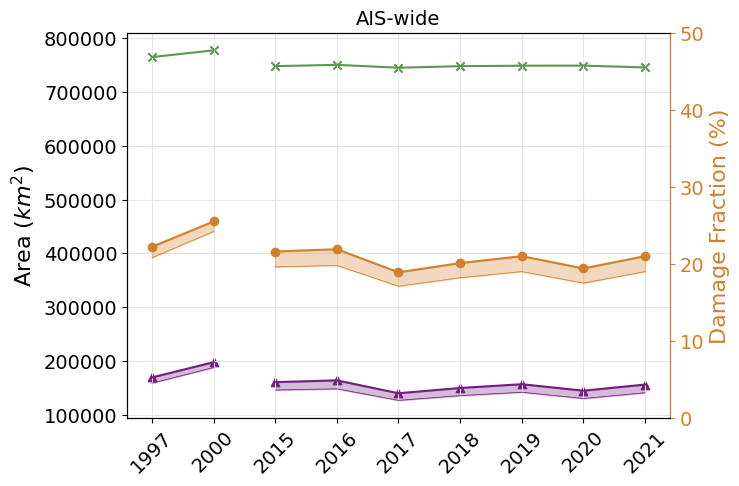

In [66]:

''' -----------------
## SINGLE PLOT  AIS
----------------- '''
# df_sector_sum
# df_sector_sum = df_data.groupby(['time']).sum().reset_index()
# df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
# df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)].copy()


# ## area in km2 instead of px
# px_res = 1000 ## used downsampled data
# df_nerd['Area(km2)'] = df_nerd['Npx']*px_res*px_res/(1e6)
# df_nerd['DMG(km2)'] = df_nerd['#DMG']*px_res*px_res/(1e6)

data_plot = df_ais_sum 


# fig, axs = plt.subplots(1, figsize=(8, 5), sharex=True ) 
# ax = axs
# ax, ax2 = plot_axes_area_dmg(ax, data_plot, 
#                     yvar_left=('#DMG', 'Damage area (px)'), 
#                     yvar_right=('Npx', 'Ice shelf area(px)'), 
#                     yscale_log=False,
#                     ax_title = 'AIS-wide',
#                     )


# ### SAVE FIGURE
# # fname = 'plot_timeseries_Area-DMG_annual_AIS'
# # print('.. Saving ', fname)
# # fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.png' ), bbox_inches='tight')
# # fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.jpg' ), bbox_inches='tight')


fig, axs = plt.subplots(1, figsize=(7, 5), sharex=True ) 
ax = axs
ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                    # yvar_left1=('#DMG', 'Damage area (px)'), 
                    # yvar_left2=('Npx', 'Ice shelf area(px)'), 
                    yvar_left1=('DMG(km2)', 'Damaged area (km2)'), 
                    yvar_left2=('Area(km2)', 'Ice shelf area (km2)'), 
                    yvar_right=('Dfrac', 'Dfrac(%)'),
                    yscale_log=False,
                    ax_title = 'AIS-wide',
                    )

ax.get_legend().remove()
# ax.set_yscale('log')
ax2.set_ylim([0,50])

### SAVE FIGURE
# # # fname = 'plot_timeseries_Area-DMG-Dfrac_annual_AIS'
# fname = 'plot_timeseries_Area-DMG-Dfrac_annual_AIS_v0_uncertainty_pct05'
# print('.. Saving ', fname)
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname +'.png'), bbox_inches='tight')
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.pdf' ), bbox_inches='tight')


## Plot Sector wide timeseries 

.. Saving  plot_timeseries_Area-DMG-Dfrac_annual_sectors_log_v0_uncertainty_pct05


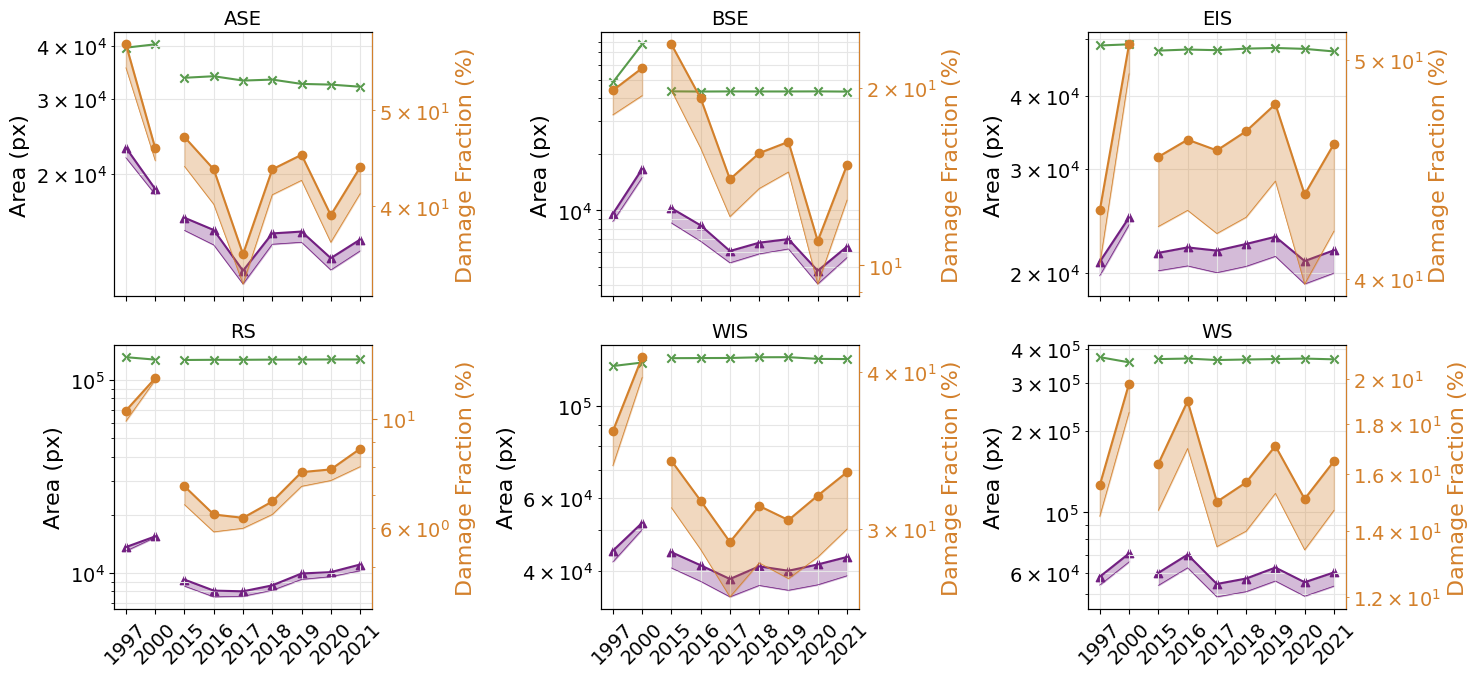

In [27]:

# df_sector_sum = df_data.groupby(['sector_ID','time']).sum().reset_index()

# df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)].copy()
# df_nerd['Dfrac'] = (df_nerd['#DMG']/df_nerd['Npx']*100).round(1) 




''' -----------------
## SUBPLOTS REGION
----------------- '''

fig, axs = plt.subplots(2, 3, figsize=(15, 7), sharex=True )  #(15,7)
r=0;c=0
for sector_ID in sector_IDs:
    data_plot = df_sector_sum.loc[df_sector_sum['sector_ID'] == sector_ID]
    ax = axs[r, c]

    ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                        yvar_left1=('#DMG', 'Damage area (px)'), 
                        yvar_left2=('Npx', 'Ice shelf area(px)'), 
                        # yvar_left2=('Npx_base', 'Ice shelf area(px)'), 
                        yvar_right=('Dfrac', 'Dfrac(%)'),
                        yscale_log=True,
                        ax_title = sector_ID,
                        add_legend=False
                        )
    # tmp: dummy right axis
    # ax2.set_ylabel('xx')


    c+=1; 
    if c>2:  c=0; r+=1
fig.tight_layout()


# ### SAVE FIGURE
# # fname = 'plot_timeseries_Area-DMG-Dfrac_annual_sectors_log' #_log_b'
# fname = 'plot_timeseries_Area-DMG-Dfrac_annual_sectors_log_v0_uncertainty_pct05' #_log_b'
# print('.. Saving ', fname)
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.png' ), bbox_inches='tight')
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.jpg' ), bbox_inches='tight')



## scatter

In [39]:
# df_nerd

,NAME,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,sector_ID,sectorNAME,geometry,time,Dfrac,Area(km2),DMG(km2),D_low,Dfrac_low
5,Abbot,112.969776,29416,4766,24650,0,2852,1622,292,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",1997,16.2,29416.0,4766.0,4243,14.4
5,Abbot,109.137830,29799,6077,23722,0,3680,2016,381,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",2000,20.4,29799.0,6077.0,5415,18.2
5,Abbot,88.529923,28611,5860,22751,0,4224,1300,336,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",2015,20.5,28611.0,5860.0,4755,16.6
5,Abbot,65.292487,28513,4971,23542,0,3789,920,262,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",2016,17.4,28513.0,4971.0,3928,13.8
5,Abbot,66.973731,28561,2843,25718,0,1687,849,307,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",2017,10.0,28561.0,2843.0,2419,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Zubchatyy,2.928068,272,53,219,0,11,22,20,WIS,West Indian,"POLYGON ((355417.402 2272581.101, 1130695.760 ...",2017,19.5,272.0,53.0,52,19.1
1,Zubchatyy,3.116466,272,83,189,0,38,21,24,WIS,West Indian,"POLYGON ((355417.402 2272581.101, 1130695.760 ...",2018,30.5,272.0,83.0,78,28.7
1,Zubchatyy,2.797997,272,84,188,0,38,27,19,WIS,West Indian,"POLYGON ((355417.402 2272581.101, 1130695.760 ...",2019,30.9,272.0,84.0,74,27.2
1,Zubchatyy,3.082912,272,82,190,0,32,27,23,WIS,West Indian,"POLYGON ((355417.402 2272581.101, 1130695.760 ...",2020,30.1,272.0,82.0,71,26.1


r_value 0.787, p_value: 8.802520e-200
.. Saving  scatter_deltaArea-deltaDMG_pctChange_axEqual_add2000


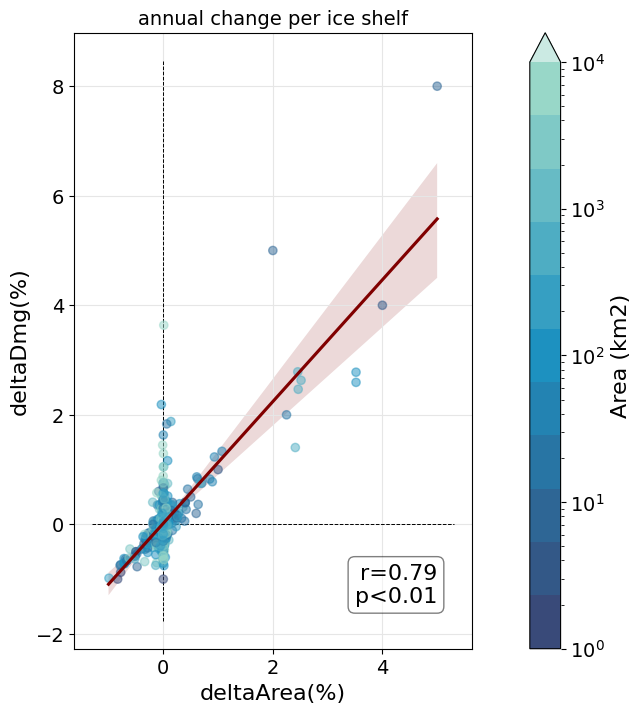

In [54]:
# df_data ## per ice hself per year

df_change = df_nerd[['NAME','time','Npx','#DMG','sector_ID','#mediumDMG','#highDMG','Area(km2)']].copy().reset_index()
# df_change = df_change
df_change['Dfrac'] = (df_change['#DMG']/df_change['Npx']*100).round(1) 

# df_sector_sum['Npx_pct_change'] = df_sector_sum.groupby(['sector_ID'])['Npx'].pct_change() #.fillna(0)
df_change['deltaArea(%)'] = df_change.groupby(['NAME'])['Npx'].pct_change()
df_change['deltaDmg(%)'] = df_change.groupby(['NAME'])['#DMG'].pct_change()
df_change['deltaDmg-med(%)'] = df_change.groupby(['NAME'])['#mediumDMG'].pct_change()
df_change['deltaDmg-hi(%)'] = df_change.groupby(['NAME'])['#highDMG'].pct_change()
df_change['deltaDfrac'] = df_change.groupby(['NAME'])['Dfrac'].diff()
df_change['deltaArea'] = df_change.groupby(['NAME'])['Npx'].diff()
df_change['deltaDmg'] = df_change.groupby(['NAME'])['#DMG'].diff()

# ## area in km2 instead of px
# px_res = 1000 ## used downsampled data
# df_change['Area(km2)'] = df_change['Npx']*px_res*px_res/(1e6)

df_change = df_change.dropna(subset=['deltaArea(%)','deltaDmg(%)'])
inf_rows = df_change[df_change['deltaDmg(%)'].isin([np.inf, -np.inf])]
df_change = df_change.drop(inf_rows.index)

## also drop icehslf > 100% area change
df_change = df_change.loc[df_change['deltaArea(%)'] < 100]

from sklearn.metrics import r2_score
R2 = r2_score(df_change['deltaArea(%)'], df_change['deltaDmg(%)'] )
R = np.sqrt(R2)

from scipy import stats
slope, intercept, r_value, p_value, _ = stats.linregress(df_change['deltaArea(%)'],df_change['deltaDmg(%)'])
print('r_value {:.3f}, p_value: {:e}'.format(r_value, p_value))

''' ----------------
Percent change with regression: zoombox
---------------- '''
alph = 0.5; 

# Create a custom colormap with a log scale
log_norm = mcolors.LogNorm(vmin=1, vmax=1e4)

fig,ax=plt.subplots(1,figsize=(15,8))
ax.grid('major',color=[0.9, 0.9, 0.9])
sc = ax.scatter(df_change['deltaArea(%)'], df_change['deltaDmg(%)'], c=df_change['Area(km2)'], # ['Npx'], 
            cmap=cmap_blues.reversed(), #vmin=0,vmax=Npx_vmax,
            norm=log_norm,
            alpha=alph, 
            # edgecolor=None, 
            zorder=3)
sns.regplot(data=df_change, x='deltaArea(%)', y='deltaDmg(%)', ax=ax, scatter=False, color='maroon')
plt.setp(ax.lines, zorder=5)
ax.vlines(0, *ax.get_ylim() ,linestyles='--',color='black', linewidth=0.7)
ax.hlines(0, *ax.get_xlim() ,linestyles='--',color='black', linewidth=0.7)
ax.set_title('annual change per ice shelf')

cbar = fig.colorbar(sc,ax=ax, extend='max',label='Area (km2)'); cbar.solids.set(alpha=1)
# ax.annotate('R={:.2f}\n P<0.01'.format(r_value), [4,-2],fontsize=16)
# Add a box around the text
bbox_props = dict(boxstyle="square,pad=0.5", edgecolor="black", facecolor="white", lw=1)
bbox_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.annotate('r={:.2f}\np<0.01'.format(r_value), 
                # [4.3, -1.8], 
                [5,-1.5], ha='right', va='bottom',
                fontsize=16, bbox=bbox_props)

# ax.set_xlim(ax.get_ylim())
# ax.set_ylim([-1.5, 2]) 
##
# ax.set_ylim([-1.5, 2]) 
# ax.set_ylim([-2,4])
# ax.set_xlim(ax.get_ylim())

ax.set_aspect('equal')


### SAVE FIGURE
# # fname = 'scatter_deltaArea-deltaDMG_pctChange_axEqual'
# fname = 'scatter_deltaArea-deltaDMG_pctChange_axEqual_add2000'
# print('.. Saving ', fname)
# # fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.png' ), bbox_inches='tight')
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.pdf' ), bbox_inches='tight')

,index,NAME,time,Npx,#DMG,sector_ID,#mediumDMG,#highDMG,Area(km2),Dfrac,deltaArea(%),deltaDmg(%),deltaDmg-med(%),deltaDmg-hi(%),deltaDfrac,deltaArea,deltaDmg
55,5,Abbot_6,2000,29799,6077,BSE,2016,381,29799.0,20.4,123.682008,43.683824,29.545455,21.411765,-36.5,29560.0,5941.0


In [23]:
raise RuntimeError

RuntimeError: 

## split-plot

ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

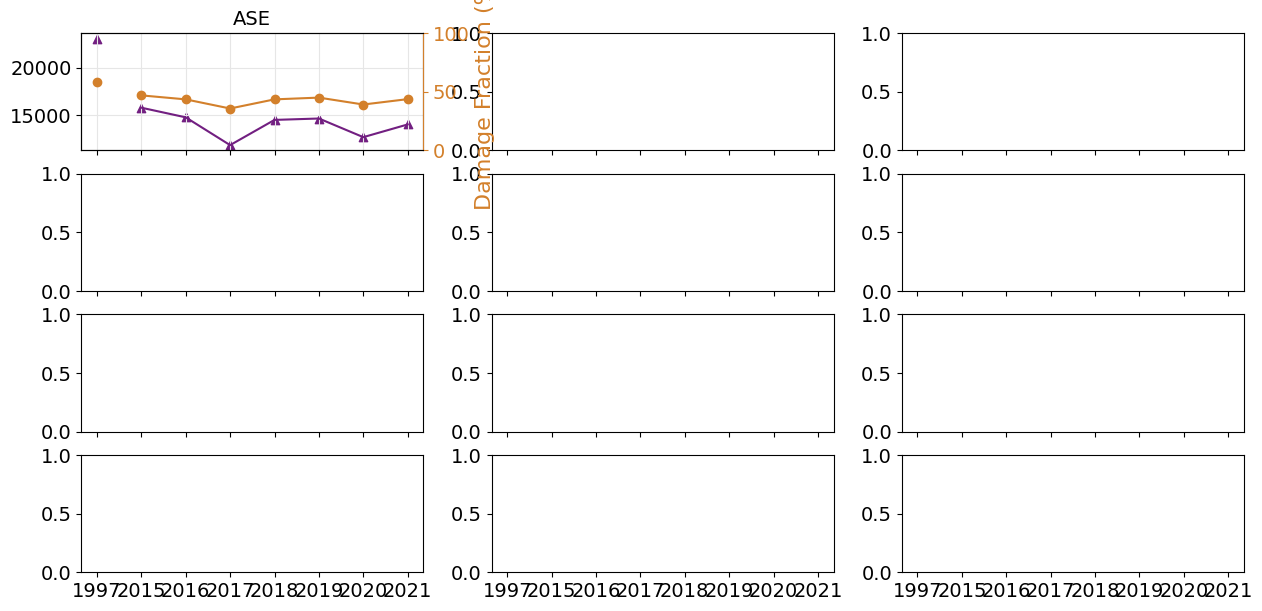

In [ ]:

def plot_axes_area_dmg2(ax, data_plot, 
                        yvar_left=('#DMG', 'Damage area (px)'), 
                        # yvar_right=('Npx', 'Ice shelf area(px)'),
                        yscale_log=False,
                        ax_title = '',
                        ):

    years_plot = [str(y) for y in list(data_plot['time'].unique())]
    x2 = np.arange(1,len(years_plot)+1) # data_plot['time'] #  data_nerd['time']
    # ax2 = ax.twinx()

    ''' -----------------
    ## Left y-axis
    ----------------- '''
    ''' Damage Area '''
    # yvar = '#DMG'; yname='Damage area (px)'
    yvar, yname = yvar_left
    
    if 'DMG' in yvar:
        ycol='#721f81'; ystyle='^';
    elif 'Npx' in yvar:
        ycol='black'; ystyle='x';

    h1= ax.plot(x2[2:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label=yvar)
    ax.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_') # my_palette2long) 
    if yscale_log:
        ax.set_yscale('log')
    ax.set_ylabel(yname)

    # Set the color of the right-hand sided y-axis label and tick labels
    ax.yaxis.label.set_color(ycol)
    ax.tick_params(axis='y', colors=ycol,which='both')
    ax.spines['left'].set_color(ycol)

    ## general axis stuff
    ax.set_title(ax_title)
    ax.set_xticks(x2, years_plot, rotation=45) 
    ax.grid('major',color=[0.9, 0.9, 0.9],which='both')
    
    return ax

''' -----------------
## SUBPLOTS REGION
----------------- '''

fig, axs = plt.subplots(4, 3, figsize=(15, 7), sharex=True ) 
r=0;c=0
for sector_ID in sector_IDs:
    # df_nerd.loc[df_nerd['NAME'] == ishelf]
    data_plot = df_sector_sum.loc[df_sector_sum['sector_ID'] == sector_ID]
    
    ax = axs[r, c]

    # -- Top subplot
    ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                        yvar_left1=('DMG(km2)', 'Damaged area (km2)'), 
                        yvar_left2=None, 
                        yvar_right=('Dfrac', 'Dfrac(%)'),
                        yscale_log=False,
                        ax_title = sector_ID,
                        add_legend=False,
    )
    ax2.set_ylim([0, 100])

    ax.set_ylabel(''); #ax2.set_ylabel('')
    # if sector_ID == 'BSE':
    #     ax2.set_ylim([7,30]); ax.set_ylim([4000,11000])
    # if sector_ID == 'RS':
    #     ax.set_ylim([7000,14000])
    # if sector_ID == 'WS':
    #     ax.set_ylim([50000, 71000])
    # if sector_ID == 'EIS':
    #     ax.set_ylim([20000, 24000])
    # if sector_ID == 'WIS':
    #     ax.set_ylim([36000, 45000])
    # # ax2.set_ylim([5,60])

    # -- Bottom subplot
    ax = axs[r+1,c]
    
    ax = plot_axes_area_dmg2(ax, data_plot, 
                        yvar_left=('Npx', 'Ice shelf area (km2)'), 
                        yscale_log=False,
                        ax_title = '', # sector_ID,
                        )
    ax.set_ylabel('')
    # ax.set_xticklabels([1997,2015,2016,2017,2018,2019,2020,2021]);

    c+=1; 
    if c>2:  c=0; r+=2
fig.tight_layout()


## move second rows of axes closer to first row of axes for each sector
for ax2 in list(axs[1,:])+list(list(axs[3,:])):
    box = ax2.get_position()
    box.y0 = box.y0 + 0.05 # move both corners (otherwise ratio adjusted)
    box.y1 = box.y1 + 0.05 # move both corners (otherwise ratio adjusted)
    ax2.set_position(box)
plt.show()


# ## SAVE FIGURE
# fname = 'plot_timeseries_Area-DMG_annual_sectors_2'
# print('.. Saving ', fname)
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.png' ), bbox_inches='tight')
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.pdf' ), bbox_inches='tight')



In [ ]:

# df_nerd[df_nerd['time'].isin([1997,2021])]

## Plot AIS wide timeseries

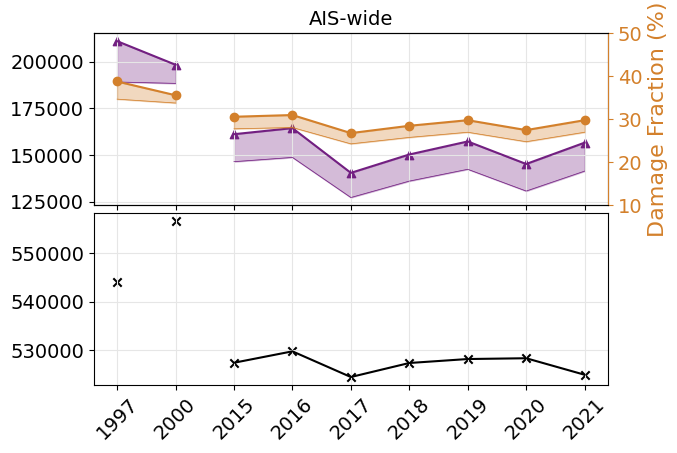

In [ ]:


def plot_axes_area_dmg2(ax, data_plot, 
                        yvar_left=('#DMG', 'Damage area (px)'), 
                        # yvar_right=('Npx', 'Ice shelf area(px)'),
                        yscale_log=False,
                        ax_title = '',
                        ):

    years_plot = [str(y) for y in list(data_plot['time'].unique())]
    x2 = np.arange(1,len(years_plot)+1) # data_plot['time'] #  data_nerd['time']
    # ax2 = ax.twinx()

    ''' -----------------
    ## Left y-axis
    ----------------- '''
    ''' Damage Area '''
    # yvar = '#DMG'; yname='Damage area (px)'
    yvar, yname = yvar_left
    
    if 'DMG' in yvar:
        ycol='#721f81'; ystyle='^';
    elif 'Npx' in yvar:
        ycol='black'; ystyle='x';

    h1= ax.plot(x2[2:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label=yvar)
    ax.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_') # my_palette2long) 
    if yscale_log:
        ax.set_yscale('log')
    ax.set_ylabel(yname)

    # Set the color of the right-hand sided y-axis label and tick labels
    ax.yaxis.label.set_color(ycol)
    ax.tick_params(axis='y', colors=ycol,which='both')
    ax.spines['left'].set_color(ycol)

    ## general axis stuff
    ax.set_title(ax_title)
    ax.set_xticks(x2, years_plot, rotation=45) 
    ax.grid('major',color=[0.9, 0.9, 0.9],which='both')
    
    return ax

''' -----------------
## SUBPLOTS REGION
----------------- '''

# # fig, axs = plt.subplots(2, 3, figsize=(15, 7), sharex=True ) 
# fig, axs = plt.subplots(4, 3, figsize=(15, 7), sharex=True ) 
# r=0;c=0
# for sector_ID in sector_IDs[:1]:
    
data_plot = df_ais_sum

fig, axs = plt.subplots(2,1, figsize=(7, 5), sharex=True ) 
ax = axs[0];  r=0

ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                    yvar_left1=('DMG(km2)', 'Damaged area (km2)'), 
                    yvar_left2=None, 
                    yvar_right=('Dfrac', 'Dfrac(%)'),
                    yscale_log=False,
                    ax_title = 'AIS-wide',
                    add_legend=False,
)
ax2.set_ylim([10, 50])

ax.set_ylabel(''); #ax2.set_ylabel('')

# -- Bottom subplot
ax = axs[r+1]#,c]

ax = plot_axes_area_dmg2(ax, data_plot, 
                    yvar_left=('Npx', 'Ice shelf area (km2)'), 
                    yscale_log=False,
                    ax_title = '', # sector_ID,
                    )
ax.set_ylabel('')
# ax.set_xticklabels([1997,2015,2016,2017,2018,2019,2020,2021]);

c+=1; 
# if c>2:  c=0; r+=2
fig.tight_layout()


## move second rows of axes closer to first row of axes for each sector
# for ax2 in list(axs[1,:])+list(list(axs[3,:])):
ax2 = axs[1]
box = ax2.get_position()
box.y0 = box.y0 + 0.05 # move both corners (otherwise ratio adjusted)
box.y1 = box.y1 + 0.05 # move both corners (otherwise ratio adjusted)
ax2.set_position(box)
plt.show()



### SAVE FIGURE
# # fname = 'plot_timeseries_Area-DMG-Dfrac_annual_AIS'
# fname = 'plot_timeseries_Area-DMG-Dfrac_annual_AIS_uncertainty_pct05_splitPlot'
# print('.. Saving ', fname)
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname +'.png'), bbox_inches='tight')
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.pdf' ), bbox_inches='tight')


In [ ]:
raise RuntimeError

RuntimeError: 

## Save to excel

In [ ]:
df_nerd.columns

Index(['NAME', 'Dsum', 'Npx', '#DMG', '#noDMG', '#nodata', '#lowDMG',
       '#mediumDMG', '#highDMG', 'sector_ID', 'sectorNAME', 'geometry', 'time',
       'Dfrac', 'Area(km2)', 'DMG(km2)', 'D_low', 'Dfrac_low'],
      dtype='object')

In [ ]:
df_ishelf_save = df_nerd[['NAME','sector_ID','time','Npx','#nodata','#DMG','Dfrac','D_low','Dfrac_low']]#.sort_values(['sector_ID','NAME','time'])
fname = 'damage_area_iceshelves_uncertainty_pct05.xlsx'

print('.. saving to ',fname)
# df_ishelf_save.to_excel(os.path.join(homedir,'Data/NERD/',fname), header=True, index=False, sheet_name='overview')
saveTrue=True
if saveTrue: 
    if os.path.exists(os.path.join(homedir,'Data/NERD/',fname)):
        print('File exists -- stop.' , os.path.join(homedir,'Data/NERD/',fname))
        # raise ValueError('File existis: ',os.path.join(homedir,'Data/NERD/',fname))
    
    else:
        with pd.ExcelWriter(os.path.join(homedir,'Data/NERD/',fname)) as writer:  
            # overview table
            # df_ishelf_save.to_excel(writer, sheet_name='overview', na_rep=-999)
            df_ishelf_save.sort_values(['NAME','time']).to_excel(writer, sheet_name='overview', na_rep=-999)

            # timeseires per variable: Npx
            df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='Npx')
            df_pivot.columns = [f'{x}' for x in df_pivot.columns]
            df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
            df_pivot.to_excel(writer, sheet_name='iceShelf_area', na_rep=-999, inf_rep=-999, header=True, index=False,)

            # timeseires per variable: DMG
            df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='#DMG')
            df_pivot.columns = [f'{x}' for x in df_pivot.columns]
            df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
            df_pivot.to_excel(writer, sheet_name='damaged_area', na_rep=-999, inf_rep=-999, header=True, index=False,)

            # timeseires per variable: Dfrac
            df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='Dfrac')
            df_pivot.columns = [f'{x}' for x in df_pivot.columns]
            df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
            df_pivot.to_excel(writer, sheet_name='damage_fraction', na_rep=-999, inf_rep=-999, header=True, index=False,)

            '''add uncertainty ''' 
            # timeseires per variable: DMG
            df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='D_low')
            df_pivot.columns = [f'{x}' for x in df_pivot.columns]
            df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
            df_pivot.to_excel(writer, sheet_name='damaged_area_lowBound', na_rep=-999, inf_rep=-999, header=True, index=False,)

            # timeseires per variable: Dfrac
            df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='Dfrac_low')
            df_pivot.columns = [f'{x}' for x in df_pivot.columns]
            df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
            df_pivot.to_excel(writer, sheet_name='damage_fraction_lowBound', na_rep=-999, inf_rep=-999, header=True, index=False,)

            ''' and nodata'''

            # timeseires per variable: Nodata
            df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='#nodata')
            df_pivot.columns = [f'{x}' for x in df_pivot.columns]
            df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
            df_pivot.to_excel(writer, sheet_name='nodata_area', na_rep=-999, inf_rep=-999, header=True, index=False,)

            # ## Dfrac per sector
            # IDs=list(df_pivot['sector_ID'].unique())
            # IDs.sort()
            # for sector_ID in IDs:
            #     df_piv_sect = df_pivot[df_pivot['sector_ID']==sector_ID]
            #     df_piv_sect.to_excel(writer, sheet_name='Dfrac_'+sector_ID, na_rep=-999, inf_rep=-999, header=True, index=False,)

.. saving to  damage_area_iceshelves_uncertainty_pct05.xlsx


# Values and stuff
## AIS wide values long term


In [ ]:
### AIS WIDE: values
# df_sector_sum = df_data.groupby(['time']).sum().reset_index()  # downsampled 400m res to 1000m 
# # df_sector_sum = df_data_1000.groupby(['time']).sum().reset_index()  # processed 1000m res
# df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
# df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]

df_tmp = df_ais_sum[df_ais_sum['time'].isin([1997,2021])].copy()
px_res = 1000

display(df_ais_sum)

## long term diff:
print(df_ais_sum[df_ais_sum['time']==1997]['#DMG'].values[0])
print('total ice shelf area 1997 {} km2'.format(  df_ais_sum[df_ais_sum['time']==1997]['Npx'].values[0]*px_res*px_res/(1e6) ) )
print('total dmg area 1997 {} km2'.format(  df_ais_sum[df_ais_sum['time']==1997]['#DMG'].values[0]*px_res*px_res/(1e6) ) )
print('PANG dmg area 2004 = 44744.59, 2009 = 42700, 2014=42980')
print('PANG changes: {}'.format( (42980-44744)/44744 * 100))
# print('PANG dmg area 2014=42980 km2')
# print('NeRD dmg area 2015={} km2; '.format(  df_ais_sum[df_ais_sum['time']==2015]['#DMG'].values[0]*px_res*px_res/(1e6) ) )

df_tmp[['Ddiff(km2)','Adiff(km2)']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.diff())*px_res*px_res/(1e6)
df_tmp[['Dpct','Apct']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_tmp = df_tmp.dropna(axis=0)
display(df_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']])


,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac,Area(km2),DMG(km2),D_low,Dfrac_low
0,1997,4303.035722,1283761,204309,1079452,1487732,113421,77991,12897,15.9,1283761.0,204309.0,182808,14.2
1,2000,5320.972572,1248529,192158,1056371,1476652,75587,95103,21468,15.4,1248529.0,192158.0,182442,14.6
2,2015,3503.128738,1249202,156294,1092908,1472203,83412,58924,13958,12.5,1249202.0,156294.0,141950,11.4
3,2016,4199.483370,1256640,205103,1051537,1474302,114410,75288,15405,16.3,1256640.0,205103.0,190470,15.2
4,2017,3151.901113,1237746,136371,1101375,1470898,71197,52502,12672,11.0,1237746.0,136371.0,123471,10.0
5,2018,3505.887311,1245588,146080,1099508,1471846,75043,56066,14971,11.7,1245588.0,146080.0,132204,10.6
6,2019,3744.820055,1250410,152996,1097414,1472496,77254,59556,16186,12.2,1250410.0,152996.0,138468,11.1
7,2020,3221.110172,1254720,141131,1113589,1473000,74192,54116,12823,11.2,1254720.0,141131.0,127005,10.1
8,2021,3555.926017,1245009,152143,1092866,1472087,79396,57808,14939,12.2,1245009.0,152143.0,137284,11.0


204309
total ice shelf area 1997 1283761.0 km2
total dmg area 1997 204309.0 km2
PANG dmg area 2004 = 44744.59, 2009 = 42700, 2014=42980
PANG changes: -3.942428035043805


,Ddiff(km2),Adiff(km2),Dpct,Apct
8,-52166.0,-38752.0,-25.532894,-3.01863


In [ ]:
### PER SECTOR
df_sector_sum = df_data.groupby(['sector_ID','time']).sum().reset_index()
# df_sector_sum = df_data_1000.groupby(['sector_ID','time']).sum().reset_index()

df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]
df_sec_tmp = df_nerd[df_nerd['time'].isin([1997,2021])].copy()

display(df_sec_tmp)
# display(df_nerd) 

## long term diff:
# df_diff_lt =df_nerd.diff()*400*400/(1e6)
# print('long term diff ABSOLUTE (Npx * 400 * 400 / 1e6 (km2)')
# display(df_diff_lt)
# 
df_sec_tmp[['Ddiff(km2)','Adiff(km2)']] = df_sec_tmp.groupby(['sector_ID'])[['#DMG','Npx']].transform(lambda x: x.diff())*400*400/(1e6)
df_sec_tmp[['Dpct','Apct']] = df_sec_tmp.groupby(['sector_ID'])[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_sec_tmp = df_sec_tmp.dropna(axis=0)
display(df_sec_tmp[['sector_ID','Ddiff(km2)','Adiff(km2)','Dpct','Apct']])

df_sec_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']].describe()
# print('long term diff PCT_CHANGE')
# display(df_nerd[df_nerd['time'].isin([1997,2021])].pct_change()*100)

# D_97 = df_nerd.loc[df_nerd['time'] == 1997]['#DMG'].values
# D_21 = df_nerd.loc[df_nerd['time'] == 2021]['#DMG'].values
# D_97, D_21, D_21-D_97, (D_21-D_97)/D_97*100

# print('total ice shelf area 1997 {} km2'.format(  764407*400*400/(1e6) ) )

,sector_ID,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
0,ASE,1997,544.534587,39546,23044,15898,604,10063,11410,1571,58.3
7,ASE,2021,407.335546,32031,14035,17851,145,5474,6781,1780,43.8
8,BSE,1997,272.680592,48453,9594,38859,0,5221,3621,752,19.8
15,BSE,2021,149.899741,43229,6410,36819,0,3682,2032,696,14.8
16,EIS,1997,604.525590,48679,20884,27338,457,9377,9746,1761,42.9
23,EIS,2021,486.249962,47559,21836,25230,493,11350,8754,1732,45.9
24,RS,1997,430.113422,130887,13588,33535,83764,4921,6671,1996,10.4
31,RS,2021,430.342998,127341,11035,33650,82656,4239,4082,2714,8.7
32,WIS,1997,1193.976629,124606,44681,67359,12566,21237,19491,3953,35.9
39,WIS,2021,960.587526,129518,43155,73778,12585,23286,15983,3886,33.3


,sector_ID,Ddiff(km2),Adiff(km2),Dpct,Apct
7,ASE,-1441.44,-1202.40,-39.094775,-19.003186
15,BSE,-509.44,-835.84,-33.187409,-10.781582
23,EIS,152.32,-179.20,4.558514,-2.300787
31,RS,-408.48,-567.36,-18.788637,-2.709207
39,WIS,-244.16,785.92,-3.415322,3.942025
47,WS,341.76,-1076.48,3.680284,-1.807455


,Ddiff(km2),Adiff(km2),Dpct,Apct
count,6.000000,6.000000,6.000000,6.000000
mean,-351.573333,-512.560000,-14.374558,-5.443365
std,626.438637,734.653277,18.915813,8.136610
min,-1441.440000,-1202.400000,-39.094775,-19.003186
25%,-484.200000,-1016.320000,-29.587716,-8.763488
50%,-326.320000,-701.600000,-11.101979,-2.504997
75%,53.200000,-276.240000,1.906382,-1.930788
max,341.760000,785.920000,4.558514,3.942025


##### Calculate range for long term change of all ice shevles

,NAME,time,Dsum,Npx,#DMG,#noDMG,Ddiff(km2),Adiff(km2),Dpct,Apct
2,Chugunov,2021,1.058034,12,12,0,1.76,1.60,1100.000000,500.000000
7,LarsenC,2021,66.512388,43256,6823,36433,591.20,-810.56,118.126598,-10.483838


,Ddiff(km2),Adiff(km2),Dpct,Apct
count,119.000000,119.000000,119.000000,119.000000
mean,-17.836639,-26.031597,-4.821318,-1.707437
std,138.809895,192.530006,106.981625,53.174929
min,-853.440000,-964.800000,-100.000000,-100.000000
25%,-17.280000,-8.960000,-32.216216,-12.091244
50%,-3.040000,-0.640000,-14.285714,-2.086927
75%,0.080000,0.880000,0.250358,3.471706
max,682.240000,720.000000,1100.000000,500.000000


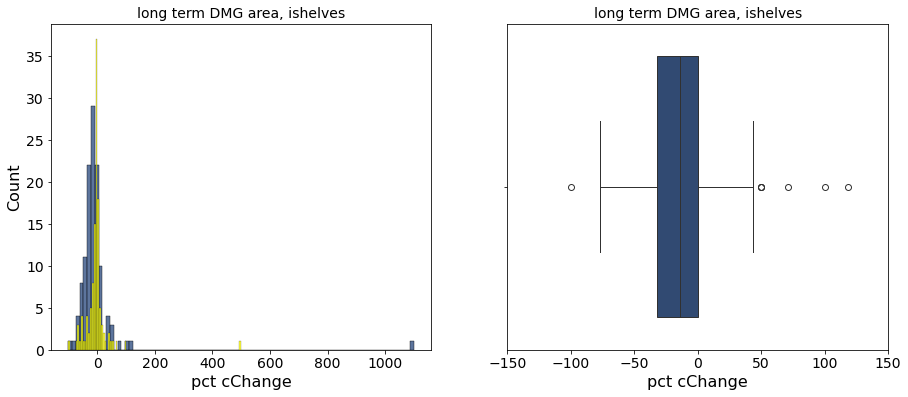

In [ ]:
df_numerical = df_data[['NAME','time','Dsum','Npx','#DMG','#noDMG']][df_data['time'].isin([1997,2021])]
# df_numerical = df_data_1000[['NAME','time','Dsum','Npx','#DMG','#noDMG']]#[df_data['time'].isin([1997,2021])]

# ## percent Change (%) of each ice shelf from 1997 to 2021;; this drops the Name row
# df_pctChange_ishelf = df_numerical.groupby(['NAME']).pct_change().dropna(axis=0)*100
# df_pctChange_ishelf

## percent Change (%) of each ice shelf from 1997 to 2021;; this keeps the name row
df_pctChange_ishelf = df_numerical.copy()
df_pctChange_ishelf[['Ddiff(km2)','Adiff(km2)']] = df_pctChange_ishelf.groupby(['NAME'])[['#DMG','Npx']].transform(lambda x: x.diff())*400*400/(1e6)
df_pctChange_ishelf[['Dpct','Apct']] = df_pctChange_ishelf.groupby(['NAME'])[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_pctChange_ishelf = df_pctChange_ishelf.dropna(axis=0)

'''
## PRINT AND PLOT histogram of values
'''

## Plot values
fig,axs=plt.subplots(1,2,figsize=(15,6))#, sharex=True)
ax=axs[0]
ax= sns.histplot(data=df_pctChange_ishelf, x='Dpct', ax=ax,
                color = my_palette2long[-1],legend=False, 
                )  
sns.histplot(data=df_pctChange_ishelf, x='Apct', ax=ax,
                color = 'yellow',legend=False, 
                )                
ax.set_title('long term DMG area, ishelves')
ax.set_xlabel('pct cChange')
ax=axs[1]
sns.boxplot(data=df_pctChange_ishelf, x='Dpct', ax=ax,
             color = my_palette2long[-1],
                )                
ax.set_title('long term DMG area, ishelves')
ax.set_xlabel('pct cChange'); ax.set_xlim([-150,150])

# df_pctChange_ishelf.loc[df_pctChange_ishelf['#DMG']> 100]
display(df_pctChange_ishelf.loc[df_pctChange_ishelf['Dpct']> 100])

#  Chugunov and Larsen C ice shelves have pct change > 100...
# tmp = df_data[df_data['time'].isin([1997,2021])]
# display( df_numerical[df_numerical['NAME'].isin(['Chugunov','LarsenC'])])


df_pctChange_ishelf[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']].describe()#percentiles=[0.5, 0.05, 0.95])

## Recent dmg change

### 1997 to 2017

In [ ]:
### AIS WIDE: values
df_sector_sum = df_data.groupby(['time']).sum().reset_index()  # downsampled 400m res to 1000m 
# df_sector_sum = df_data_1000.groupby(['time']).sum().reset_index()  # processed 1000m res
df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]

y0 = 1997
y1 = 2017
df_tmp = df_nerd[df_nerd['time'].isin([y0,y1])].copy()
px_res = 1000

display(df_nerd)

print(f'{y0}-{y1}')
print('total ice shelf area y0 {} km2'.format(  df_nerd[df_nerd['time']==y0]['Npx'].values[0]*px_res*px_res/(1e6) ) )
print('total dmg area y0 {} km2'.format(  df_nerd[df_nerd['time']==y0]['#DMG'].values[0]*px_res*px_res/(1e6) ) )

df_tmp[['Ddiff(km2)','Adiff(km2)']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.diff())*px_res*px_res/(1e6)
df_tmp[['Dpct','Apct']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_tmp = df_tmp.dropna(axis=0)
display(df_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']])


,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
0,1997,4347.294508,764407,169830,371713,222864,78739,77163,13928,22.2
1,2015,3665.852624,747634,161176,365544,220914,85643,60764,14769,21.6
2,2016,3713.269682,750049,164426,364576,221047,89872,58936,15618,21.9
3,2017,3297.661603,744676,140527,383113,221036,73084,54004,13439,18.9
4,2018,3644.526572,747618,150331,376151,221136,77134,57468,15729,20.1
5,2019,3884.647184,748438,157298,369905,221235,79304,61085,16909,21.0
6,2020,3356.100787,748601,145254,382293,221054,76136,55606,13512,19.4
7,2021,3688.687054,745186,156646,367416,221124,81641,59386,15619,21.0


1997-2017
total ice shelf area y0 764407.0 km2
total dmg area y0 169830.0 km2


,Ddiff(km2),Adiff(km2),Dpct,Apct
3,-29303.0,-19731.0,-17.254313,-2.581217


### 2017-2021

In [ ]:
### AIS WIDE: values
df_sector_sum = df_data.groupby(['time']).sum().reset_index()  # downsampled 400m res to 1000m 
# df_sector_sum = df_data_1000.groupby(['time']).sum().reset_index()  # processed 1000m res
df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]

y0 = 2017
y1 = 2021
df_tmp = df_nerd[df_nerd['time'].isin([y0,y1])].copy()
px_res = 1000

display(df_nerd)

print(f'{y0}-{y1}')
print('total ice shelf area y0 {} km2'.format(  df_nerd[df_nerd['time']==y0]['Npx'].values[0]*px_res*px_res/(1e6) ) )
print('total dmg area y0 {} km2'.format(  df_nerd[df_nerd['time']==y0]['#DMG'].values[0]*px_res*px_res/(1e6) ) )

df_tmp[['Ddiff(km2)','Adiff(km2)']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.diff())*px_res*px_res/(1e6)
df_tmp[['Dpct','Apct']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_tmp = df_tmp.dropna(axis=0)
display(df_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']])


,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
0,1997,4347.294508,764407,169830,371713,222864,78739,77163,13928,22.2
1,2015,3665.852624,747634,161176,365544,220914,85643,60764,14769,21.6
2,2016,3713.269682,750049,164426,364576,221047,89872,58936,15618,21.9
3,2017,3297.661603,744676,140527,383113,221036,73084,54004,13439,18.9
4,2018,3644.526572,747618,150331,376151,221136,77134,57468,15729,20.1
5,2019,3884.647184,748438,157298,369905,221235,79304,61085,16909,21.0
6,2020,3356.100787,748601,145254,382293,221054,76136,55606,13512,19.4
7,2021,3688.687054,745186,156646,367416,221124,81641,59386,15619,21.0


2017-2021
total ice shelf area y0 744676.0 km2
total dmg area y0 140527.0 km2


,Ddiff(km2),Adiff(km2),Dpct,Apct
7,16119.0,510.0,11.470394,0.068486


### 2015-2021

In [ ]:
### PER SECTOR
df_sector_sum = df_data.groupby(['sector_ID','time']).sum().reset_index()
# df_sector_sum = df_data_1000.groupby(['sector_ID','time']).sum().reset_index()

df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]
df_sec_tmp = df_nerd[df_nerd['time'].isin([2015,2021])].copy()

display(df_sec_tmp)
# display(df_nerd) 

## long term diff:
# df_diff_lt =df_nerd.diff()*400*400/(1e6)
# print('long term diff ABSOLUTE (Npx * 400 * 400 / 1e6 (km2)')
# display(df_diff_lt)
# 
df_sec_tmp[['Ddiff(km2)','Adiff(km2)']] = df_sec_tmp.groupby(['sector_ID'])[['#DMG','Npx']].transform(lambda x: x.diff())*400*400/(1e6)
df_sec_tmp[['Dpct','Apct']] = df_sec_tmp.groupby(['sector_ID'])[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_sec_tmp = df_sec_tmp.dropna(axis=0)
display(df_sec_tmp[['sector_ID','Ddiff(km2)','Adiff(km2)','Dpct','Apct']])

df_sec_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']].describe()
# print('long term diff PCT_CHANGE')
# display(df_nerd[df_nerd['time'].isin([1997,2021])].pct_change()*100)


,sector_ID,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
1,ASE,2015,418.875696,33614,15792,17677,145,6608,7531,1653,47.0
7,ASE,2021,407.335546,32031,14035,17851,145,5474,6781,1780,43.8
9,BSE,2015,174.500461,43352,10283,33069,0,7120,2451,712,23.7
15,BSE,2021,149.899741,43229,6410,36819,0,3682,2032,696,14.8
17,EIS,2015,477.751899,47713,21618,25633,462,10783,9196,1639,45.3
23,EIS,2021,486.249962,47559,21836,25230,493,11350,8754,1732,45.9
25,RS,2015,275.523419,126565,9218,34691,82656,4176,3694,1348,7.3
31,RS,2021,430.342998,127341,11035,33650,82656,4239,4082,2714,8.7
33,WIS,2015,957.802220,130174,44321,73192,12661,24310,16551,3460,34.0
39,WIS,2021,960.587526,129518,43155,73778,12585,23286,15983,3886,33.3


,sector_ID,Ddiff(km2),Adiff(km2),Dpct,Apct
7,ASE,-281.12,-253.28,-11.125887,-4.709347
15,BSE,-619.68,-19.68,-37.664106,-0.283724
23,EIS,34.88,-24.64,1.008419,-0.322763
31,RS,290.72,124.16,19.711434,0.613124
39,WIS,-186.56,-104.96,-2.630807,-0.503941
47,WS,36.96,-113.28,0.385360,-0.193329


,Ddiff(km2),Adiff(km2),Dpct,Apct
count,6.000000,6.000000,6.000000,6.000000
mean,-120.800000,-65.280000,-5.052598,-0.899997
std,315.398581,125.571482,18.898809,1.906301
min,-619.680000,-253.280000,-37.664106,-4.709347
25%,-257.480000,-111.200000,-9.002117,-0.458646
50%,-75.840000,-64.800000,-1.122724,-0.303244
75%,36.440000,-20.920000,0.852654,-0.215927
max,290.720000,124.160000,19.711434,0.613124


# Scatterplot Area-change and Damage-change (per ice shelf)

In [ ]:
df_data ## per ice hself per year

df_change = df_data[~df_data['time'].between(2004, 2014)].copy().reset_index()
df_change = df_change[['NAME','time','Npx','#DMG','sector_ID','#mediumDMG','#highDMG']]
df_change['Dfrac'] = (df_change['#DMG']/df_change['Npx']*100).round(1) 

# df_sector_sum['Npx_pct_change'] = df_sector_sum.groupby(['sector_ID'])['Npx'].pct_change() #.fillna(0)
df_change['deltaArea(%)'] = df_change.groupby(['NAME'])['Npx'].pct_change()
df_change['deltaDmg(%)'] = df_change.groupby(['NAME'])['#DMG'].pct_change()
df_change['deltaDmg-med(%)'] = df_change.groupby(['NAME'])['#mediumDMG'].pct_change()
df_change['deltaDmg-hi(%)'] = df_change.groupby(['NAME'])['#highDMG'].pct_change()
df_change['deltaDfrac'] = df_change.groupby(['NAME'])['Dfrac'].diff()
df_change['deltaArea'] = df_change.groupby(['NAME'])['Npx'].diff()
df_change['deltaDmg'] = df_change.groupby(['NAME'])['#DMG'].diff()
df_change


,NAME,time,Npx,#DMG,sector_ID,#mediumDMG,#highDMG,Dfrac,deltaArea(%),deltaDmg(%),deltaDmg-med(%),deltaDmg-hi(%),deltaDfrac,deltaArea,deltaDmg
0,Underwood,1997,158,112,EIS,33,4,70.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vincennes_Bay,1997,668,533,EIS,249,69,79.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fox,1997,27,27,EIS,11,12,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Whittle,1997,87,83,EIS,68,5,95.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Williamson,1997,175,171,EIS,119,3,97.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Dalk,2021,45,45,WIS,19,26,100.0,0.000000,0.000000,0.461538,-0.187500,0.0,0.0,0.0
1416,Flatnes,2021,67,65,WIS,15,38,97.0,0.000000,0.031746,-0.166667,0.055556,3.0,0.0,2.0
1417,Hovde,2021,18,18,WIS,6,12,100.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1418,Sorsdal,2021,135,135,WIS,89,16,100.0,-0.709052,-0.707158,-0.744253,-0.724138,0.6,-329.0,-326.0


In [ ]:
df_change = df_change.dropna(subset=['deltaArea(%)','deltaDmg(%)'])
inf_rows = df_change[df_change['deltaDmg(%)'].isin([np.inf, -np.inf])]
df_change = df_change.drop(inf_rows.index)

from sklearn.metrics import r2_score
R2 = r2_score(df_change['deltaArea(%)'], df_change['deltaDmg(%)'] )
R = np.sqrt(R2)

from scipy import stats
slope, intercept, r_value, p_value, _ = stats.linregress(df_change['deltaArea(%)'],df_change['deltaDmg(%)'])
print('r_value {:.3f}, p_value: {:e}'.format(r_value, p_value))

''' ----------------
Percent change with regression
---------------- '''

alph = 0.5; 
c_var = df_change['Npx']; Npx_vmax = 6000
c_map = cmap_blues.reversed()


# Create a custom colormap with a log scale
log_norm = mcolors.LogNorm(vmin=1, vmax=1e4)

fig,ax=plt.subplots(1,figsize=(15,8))
ax.grid('major',color=[0.9, 0.9, 0.9])
sc = ax.scatter(df_change['deltaArea(%)'], df_change['deltaDmg(%)'], c=df_change['Npx'], 
            cmap=cmap_blues.reversed(), #vmin=0,vmax=Npx_vmax,
            norm=log_norm,
            alpha=alph, edgecolor=None, zorder=3)
sns.regplot(data=df_change, x='deltaArea(%)', y='deltaDmg(%)', ax=ax, scatter=False, color='maroon')
plt.setp(ax.lines, zorder=5)
ax.vlines(0, *ax.get_ylim() ,linestyles='--',color='black', linewidth=0.7)
ax.hlines(0, *ax.get_xlim() ,linestyles='--',color='black', linewidth=0.7)
ax.set_title('Annual change per ice shelf (2015-2021)')

cbar = fig.colorbar(sc,ax=ax, extend='max',label='Ice shelf area (km2)'); cbar.solids.set(alpha=1)
# ax.annotate('R={:.2f}\n P<0.01'.format(r_value), [4,-2],fontsize=16)
# Add a box around the text
bbox_props = dict(boxstyle="square,pad=0.5", edgecolor="black", facecolor="white", lw=1)
bbox_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.annotate('r={:.2f}\np<0.01'.format(r_value), 
                # [4.3, -1.8], 
                [5,-1.5], ha='right', va='bottom',
                fontsize=16, bbox=bbox_props)

ax.plot([-1,5], [-1,5],'-.',color='gray',linewidth=0.7, label='1:1')
ax.set_xlabel('Ice shelf area change (%)')
ax.set_ylabel('Damaged area change (%)')


### SAVE FIGURE 
# fname = 'scatter_deltaArea-deltaDMG_pctChange_wide.png'
# print('.. Saving ', fname)
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname ), bbox_inches='tight')

r_value 0.841, p_value: 4.102047e-222


NameError: name 'cmap_blues' is not defined

r_value 0.841, p_value: 4.102047e-222


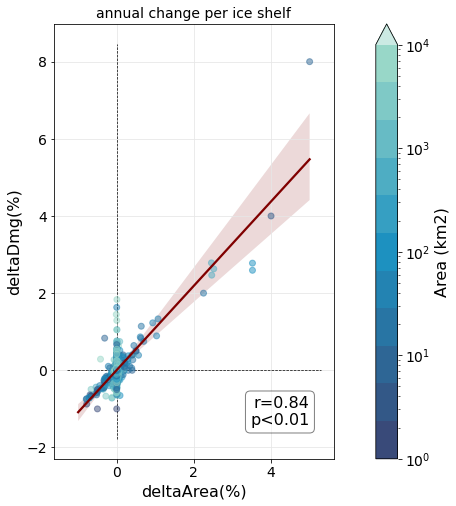

In [ ]:
df_data ## per ice hself per year

df_change = df_data[~df_data['time'].between(2004, 2014)].copy().reset_index()
df_change = df_change[['NAME','time','Npx','#DMG','sector_ID','#mediumDMG','#highDMG']]
df_change['Dfrac'] = (df_change['#DMG']/df_change['Npx']*100).round(1) 

# df_sector_sum['Npx_pct_change'] = df_sector_sum.groupby(['sector_ID'])['Npx'].pct_change() #.fillna(0)
df_change['deltaArea(%)'] = df_change.groupby(['NAME'])['Npx'].pct_change()
df_change['deltaDmg(%)'] = df_change.groupby(['NAME'])['#DMG'].pct_change()
df_change['deltaDmg-med(%)'] = df_change.groupby(['NAME'])['#mediumDMG'].pct_change()
df_change['deltaDmg-hi(%)'] = df_change.groupby(['NAME'])['#highDMG'].pct_change()
df_change['deltaDfrac'] = df_change.groupby(['NAME'])['Dfrac'].diff()
df_change['deltaArea'] = df_change.groupby(['NAME'])['Npx'].diff()
df_change['deltaDmg'] = df_change.groupby(['NAME'])['#DMG'].diff()

## area in km2 instead of px
px_res = 1000 ## used downsampled data
df_change['Area(km2)'] = df_change['Npx']*px_res*px_res/(1e6)

df_change = df_change.dropna(subset=['deltaArea(%)','deltaDmg(%)'])
inf_rows = df_change[df_change['deltaDmg(%)'].isin([np.inf, -np.inf])]
df_change = df_change.drop(inf_rows.index)

from sklearn.metrics import r2_score
R2 = r2_score(df_change['deltaArea(%)'], df_change['deltaDmg(%)'] )
R = np.sqrt(R2)

from scipy import stats
slope, intercept, r_value, p_value, _ = stats.linregress(df_change['deltaArea(%)'],df_change['deltaDmg(%)'])
print('r_value {:.3f}, p_value: {:e}'.format(r_value, p_value))

''' ----------------
Percent change with regression: zoombox
---------------- '''
alph = 0.5; 

# Create a custom colormap with a log scale
log_norm = mcolors.LogNorm(vmin=1, vmax=1e4)

fig,ax=plt.subplots(1,figsize=(15,8))
ax.grid('major',color=[0.9, 0.9, 0.9])
sc = ax.scatter(df_change['deltaArea(%)'], df_change['deltaDmg(%)'], c=df_change['Area(km2)'], # ['Npx'], 
            cmap=cmap_blues.reversed(), #vmin=0,vmax=Npx_vmax,
            norm=log_norm,
            alpha=alph, 
            # edgecolor=None, 
            zorder=3)
sns.regplot(data=df_change, x='deltaArea(%)', y='deltaDmg(%)', ax=ax, scatter=False, color='maroon')
plt.setp(ax.lines, zorder=5)
ax.vlines(0, *ax.get_ylim() ,linestyles='--',color='black', linewidth=0.7)
ax.hlines(0, *ax.get_xlim() ,linestyles='--',color='black', linewidth=0.7)
ax.set_title('annual change per ice shelf')

cbar = fig.colorbar(sc,ax=ax, extend='max',label='Area (km2)'); cbar.solids.set(alpha=1)
# ax.annotate('R={:.2f}\n P<0.01'.format(r_value), [4,-2],fontsize=16)
# Add a box around the text
bbox_props = dict(boxstyle="square,pad=0.5", edgecolor="black", facecolor="white", lw=1)
bbox_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.annotate('r={:.2f}\np<0.01'.format(r_value), 
                # [4.3, -1.8], 
                [5,-1.5], ha='right', va='bottom',
                fontsize=16, bbox=bbox_props)

# ax.set_xlim(ax.get_ylim())
# ax.set_ylim([-1.5, 2]) 
ax.set_aspect('equal')


### SAVE FIGURE
# fname = 'scatter_deltaArea-deltaDMG_pctChange_axEqual'
# print('.. Saving ', fname)
# # fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.png' ), bbox_inches='tight')
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.pdf' ), bbox_inches='tight')

In [ ]:
print(p_value)

4.1020466752575083e-222
